<div style="padding:20px;color:#DEB078;margin:0;font-size:300%;text-align:center;display:fill;border-radius:5px;background-color:#990012;overflow:hidden;font-weight:800">🍷 Wine Quality 🍷</div>



* This datasets is related to red variants of the Portuguese "Vinho Verde" wine.
* The dataset describes the amount of various chemicals present in wine and their effect on it's quality. 
* The datasets can be viewed as classification or regression tasks. 
* The classes are ordered and not balanced (e.g. there are much more normal wines than excellent or poor ones).
* Our task is to predict the quality of wine using the given data.

## <b><div style='padding:15px;background-color:#990012;color:#DEB078;border-radius:2px;font-size:110%;text-align: center'>1 | Content Overview</div></b>

<b>1 | Content Overview</b>
 
<b>2 | Libraries and Dataset Setup</b>
 
   * 2.1 Import Libraries
   * 2.2 Configure Properties
   * 2.3 Import Data

<b>3 | Structure Investigation</b>
 
   * 3.1 Structure Size
   * 3.2 Differences in structure
   * 3.3 Checking Id Column
   * 3.4 Datatypes Available
   * 3.5 Features Descriptions   
    
<b>4 | Dataframe Content Inspection</b>
 
   * 4.1 Null Values Check
   * 4.2 Unique Values Check
   * 4.3 Value Behaviour

<b>5 | Target Variable Analysis</b>
 
   * 5.1 For Original Data
   * 5.2 For Training Data
    
<b>6 | Univariate Analysis</b>
 
   * 6.1 Summary for Columns (Describe)
   * 6.2 Individual Column Shape
   * 6.3 Individual Column Value Observation (Outlier using IQR)
    
<b>7 | Combining Data and Relationship matrix</b>
 
   * 7.1 Combining Original and Training Data
   * 7.2 Creating Relation Matrix and Graph For Combined Training Data
   * 7.3 Creating Relation Matrix and Graph For Test Data
    
<b>8 | Multivariate Analysis wrt Quality</b>
 
   * 8.1 Relation with Quality in terms of corr coeficient (Combined Training and Org Data)
   * 8.2 Relation with Quality using pairplot (Combined Training and Org Data)
   * 8.3 Relation with Quality using boxplot (Combined Training and Org Data)
 
<b>9 | Multivariate Analysis leaving Quality</b>
 
   * 9.1 Other Interesting Relationships For Training Data (Original & Training Data Combined)
   * 9.2 Other Interesting Relationships For Test Data
 
<b>10 | Analysis So Far</b>
 
<b>11 | Feature Engineering and Modelling</b>

## <b><div style='padding:15px;background-color:#990012;color:#DEB078;border-radius:2px;font-size:110%;text-align: center'>2  |  Libraries & Dataset Setup</div></b>

### <b><span style='color:#DEB078'>2.1 |</span><span style='color:#990012'> Import Libraries</span></b>  

In [2]:
from IPython.display import clear_output
#!pip install plotly --upgrade
#!pip install lazypredict
clear_output()

In [3]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
import math
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

### <b><span style='color:#DEB078'>2.2 |</span><span style='color:#990012'> Configure Properties</span></b>  

In [4]:
%matplotlib inline
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns',100)          # Set now of columns visible to 100
pd.set_option('display.max_rows',100)          # Set now of rows visible to 100
temp=dict(layout=go.Layout(font=dict(family="Franklin Gothic", size=12), height=500, width=1000))
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

### <b><span style='color:#DEB078'>2.3 |</span><span style='color:#990012'> Import Data</span></b>  

In [5]:
df_original=pd.read_csv("/Users/abhi011097/Workspace/Dataset_Analysis/12_S3E5_Wine_Quality/Dataset/winequality-red.csv")
df_train=pd.read_csv("/Users/abhi011097/Workspace/Dataset_Analysis/12_S3E5_Wine_Quality/Dataset/train.csv")
df_test=pd.read_csv("/Users/abhi011097/Workspace/Dataset_Analysis/12_S3E5_Wine_Quality/Dataset/test.csv")

## <b><div style='padding:15px;background-color:#990012;color:#DEB078;border-radius:2px;font-size:110%;text-align: center'>3  |  Inspecting Dataframe Structure</div></b>

### <b><span style='color:#DEB078'>3.1 |</span><span style='color:#990012'> Structure Size</span></b>  

In [6]:
df_original.shape

(1599, 12)

In [7]:
df_train.shape

(2056, 13)

In [8]:
df_test.shape

(1372, 12)

<div class="alert alert-block alert-info" style="background-color:#4d0000;color:white;border-color:black;width:60%;margin: auto;text-align: center;">
<b>Insight:</b> From the above numbers we can see 1 extra column present in training data compared to original data</div>

### <b><span style='color:#DEB078'>3.2 |</span><span style='color:#990012'> Differences in structure</span></b>  

In [9]:
print('Column Present only in original ', set(df_original.columns).difference(set(df_train.columns)))
print('Column Present only in train    ', set(df_train.columns).difference(set(df_original.columns)))

Column Present only in original  set()
Column Present only in train     {'Id'}


<div class="alert alert-block alert-info" style="background-color:#4d0000;color:white;border-color:black;width:60%;margin: auto;text-align: center;">
<b>Insight:</b> Id column in training data is extra , we can validate if its unique identifier</div>

### <b><span style='color:#DEB078'>3.3 |</span><span style='color:#990012'> Checking Id Column</span></b>  

In [10]:
df_train['Id'].nunique() # its a row identifier 

2056

In [11]:
df_train.drop(columns='Id',inplace=True)

In [12]:
df_test.drop(columns='Id',inplace=True)

### <b><span style='color:#DEB078'>3.4 |</span><span style='color:#990012'> Datatypes Available</span></b>  

In [13]:
pd.value_counts(df_train.dtypes)

float64    11
int64       1
dtype: int64

In [14]:
pd.value_counts(df_original.dtypes)

float64    11
int64       1
dtype: int64

In [15]:
pd.value_counts(df_test.dtypes)

float64    11
dtype: int64

<div class="alert alert-block alert-info" style="background-color:#4d0000;color:white;border-color:black;width:60%;margin: auto;text-align: center;">
<b>Insight:</b> Same datatypes available in training as well as Original dataset</div>

### <b><span style='color:#DEB078'>3.5 |</span><span style='color:#990012'> Features Descriptions</span></b>  

* <b>Fixed acidity </b> : most acids involved with wine or fixed or nonvolatile (do not evaporate readily).  
 
* <b>Volatile acidity </b>: the amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste.
    
* <b>Citric acid </b>: found in small quantities, citric acid can add 'freshness' and flavor to wines.   
 
* <b>Residual sugar </b>: the amount of sugar remaining after fermentation stops, it's rare to find wines with less than 1 gram/liter and wines with greater than 45 grams/liter are considered sweet.    

* <b>Chlorides </b>: the amount of salt in the wine.
    
* <b>Free sulfur dioxide </b>: the free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion; it prevents microbial growth and the oxidation of wine. 
   
* <b>Total sulfur dioxide </b>: amount of free and bound forms of S02; in low concentrations, SO2 is mostly undetectable in wine, but at free SO2 concentrations over 50 ppm, SO2 becomes evident in the nose and taste of wine.
 
* <b>Density </b>: the density of water is close to that of water depending on the percent alcohol and sugar content.
    
* <b>pH </b>: describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3-4 on the pH scale.
    
* <b>Sulphates </b>: a wine additive which can contribute to sulfur dioxide gas (S02) levels, wich acts as an antimicrobial and antioxidant. 
   
* <b>Alcohol </b>: the percent alcohol content of the wine.    

* <b>Quality </b>: wine quality rating

## <b><div style='padding:15px;background-color:#990012;color:#DEB078;border-radius:2px;font-size:110%;text-align: center'>4  | Dataframe Content Inspection</div></b>

### <b><span style='color:#DEB078'>4.1 |</span><span style='color:#990012'> Null Values Check</span></b>

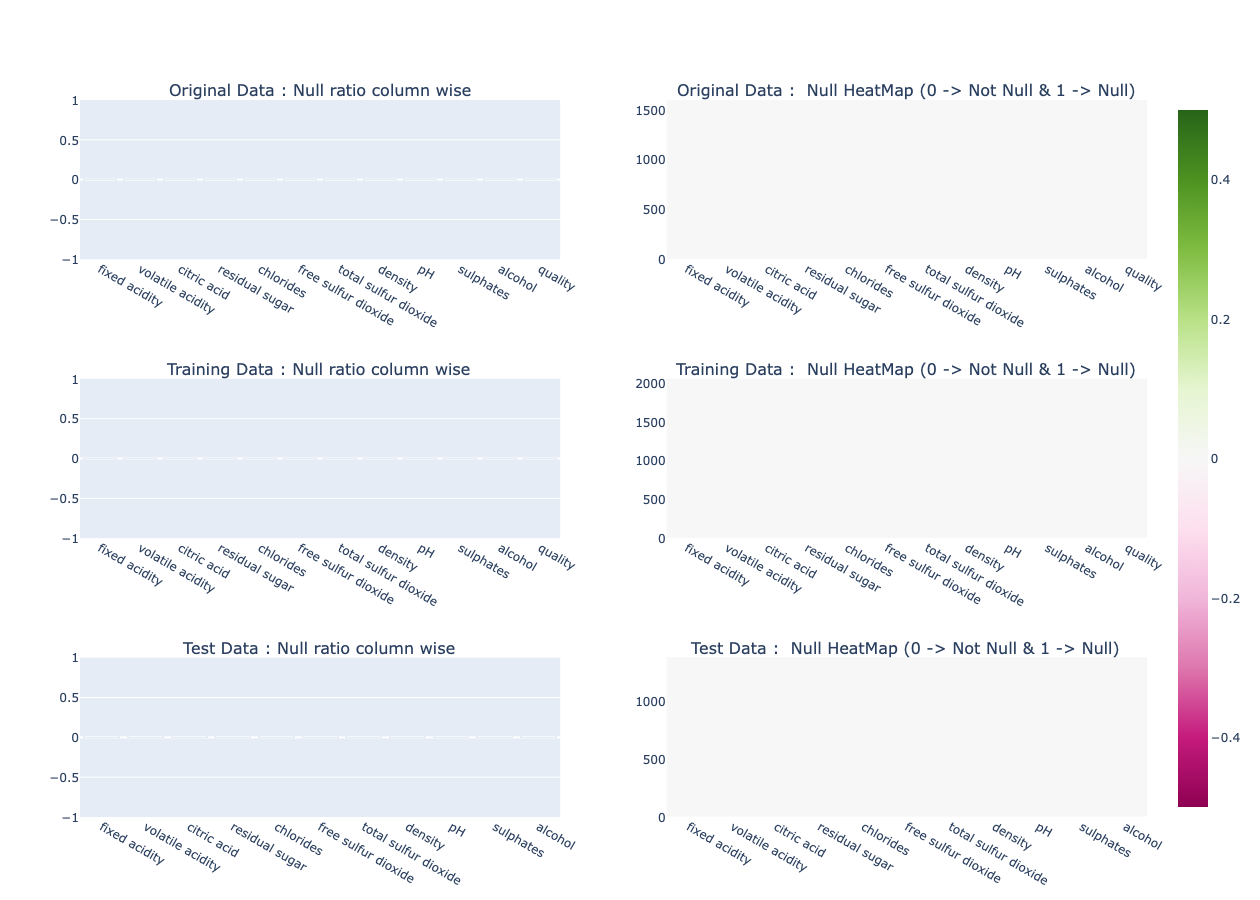

In [16]:
fig= make_subplots(rows=3,cols=2,
                  subplot_titles=(
                      "Original Data : Null ratio column wise", "Original Data :  Null HeatMap (0 -> Not Null & 1 -> Null)",
                      "Training Data : Null ratio column wise", "Training Data :  Null HeatMap (0 -> Not Null & 1 -> Null)",
                      "Test Data : Null ratio column wise", "Test Data :  Null HeatMap (0 -> Not Null & 1 -> Null)"
                                 
                                 )
                  )



temp_data= df_original.isna().mean().sort_values()

fig.add_trace(
    go.Bar(x=temp_data.index, y=temp_data.values),
    row=1, col=1
)

fig.add_trace(px.imshow(
                        df_original.isna().astype(np.int8)
                       ).data[0],
              row=1,col=2)

temp_data= df_train.isna().mean().sort_values()

fig.add_trace(
    go.Bar(x=temp_data.index, y=temp_data.values),
    row=2, col=1
)

fig.add_trace(px.imshow(
                        df_train.isna().astype(np.int8)
                       ).data[0],
              row=2,col=2)

temp_data= df_test.isna().mean().sort_values()

fig.add_trace(
    go.Bar(x=temp_data.index, y=temp_data.values),
    row=3, col=1
)

fig.add_trace(px.imshow(
                        df_test.isna().astype(np.int8)
                       ).data[0],
              row=3,col=2)

fig.update_layout(showlegend=False,height=900)
fig.show()

<div class="alert alert-block alert-info" style="background-color:#4d0000;color:white;border-color:black;width:60%;margin: auto;text-align: center;">
<b>Insight:</b> From the above plot, we see No null values present in original Dataset as well as training dataset</div>

### <b><span style='color:#DEB078'>4.2 |</span><span style='color:#990012'> Unique Values Check</span></b>

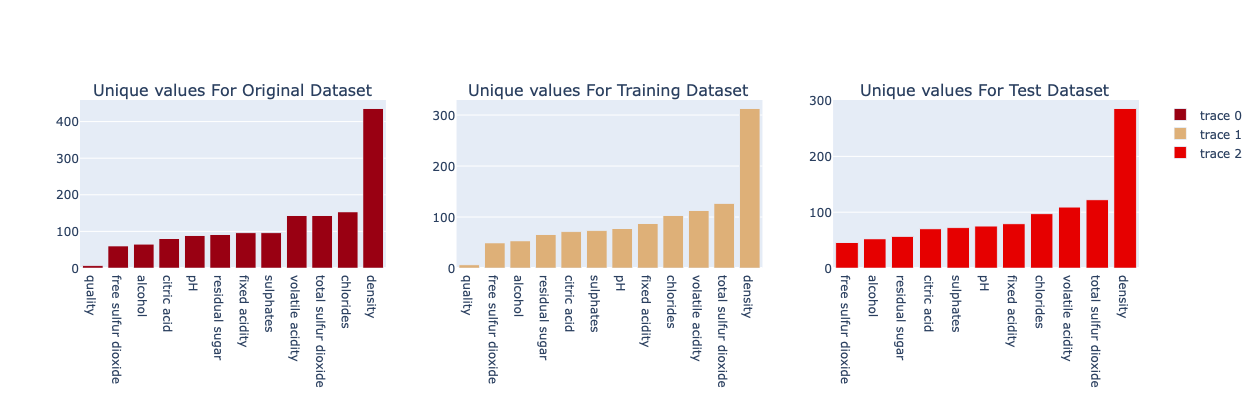

In [17]:
fig = make_subplots(rows=1, cols=3,
                    subplot_titles=("Unique values For Original Dataset", "Unique values For Training Dataset","Unique values For Test Dataset"))

temp_data=df_original.nunique().sort_values()

fig.add_trace(
    go.Bar(x=temp_data.index, y=temp_data.values,marker=dict(color='#990012')),
    row=1, col=1
)

temp_data=df_train.nunique().sort_values()

fig.add_trace(
    go.Bar(x=temp_data.index, y=temp_data.values,marker=dict(color='#DEB078')),
    row=1, col=2
)

temp_data=df_test.nunique().sort_values()

fig.add_trace(
    go.Bar(x=temp_data.index, y=temp_data.values,marker=dict(color='#e60000')),
    row=1, col=3
)

fig.update_layout(height=400)
fig.show()

<div class="alert alert-block alert-info" style="background-color:#4d0000;color:white;border-color:black;width:80%;margin: auto;text-align: center;">
<b>Insight:</b> From the above plot, we see unique values present in original Dataset as well as training dataset is approx similliar in distribution</div>

### <b><span style='color:#DEB078'>4.3 |</span><span style='color:#990012'> Value Behaviour</span></b>

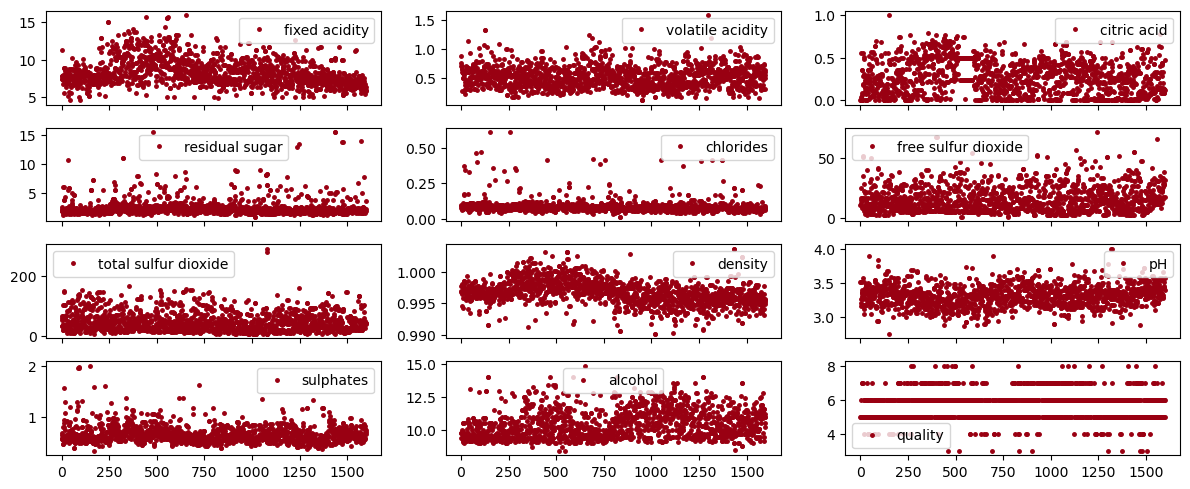

In [18]:
# For all Numerical columnn for all rows 
df_original.plot(lw=0, marker=".", subplots=True, layout=(-1, 3),
          figsize=(12,5), markersize=5,color='#990012')
plt.tight_layout()

<div class="alert alert-block alert-info" style="background-color:#4d0000;color:white;border-color:black;width:80%;margin: auto;text-align: center;">
<b>Insight:</b> Values in each subpots appear to be continous in range except last column quality , quality seems to take discrete values as points apprears to be in discrete intervals</div>

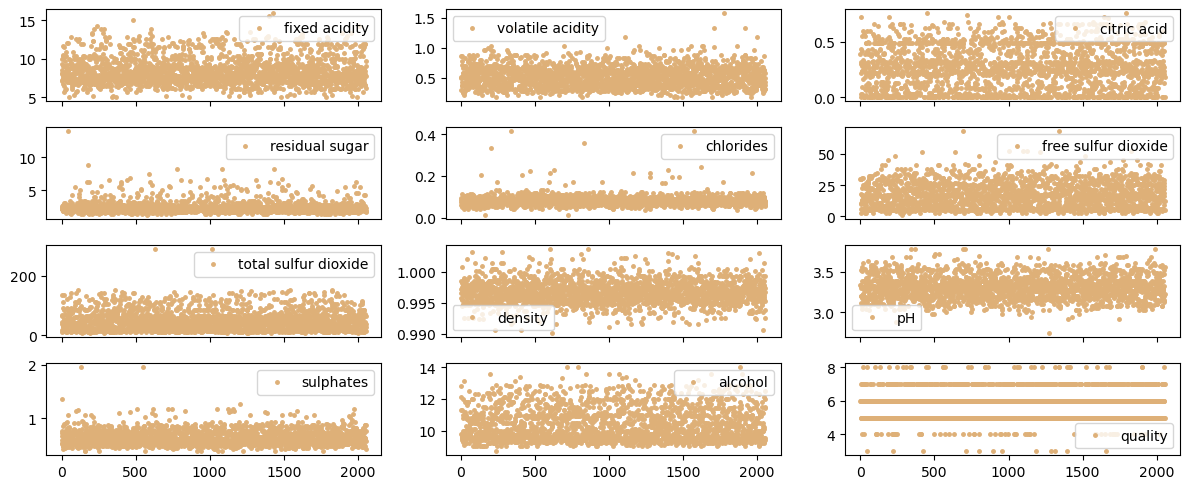

In [19]:
# For all Numerical columnn for all rows 
df_train.plot(lw=0, marker=".", subplots=True, layout=(-1, 3),
          figsize=(12,5), markersize=5,color='#DEB078')
plt.tight_layout()

<div class="alert alert-block alert-info" style="background-color:#4d0000;color:white;border-color:black;width:80%;margin: auto;text-align: center;">
<b>Insight:</b> Values in each subpots appear to be continous in range except last column quality , quality seems to take discrete values as points apprears to be in discrete intervals</div>

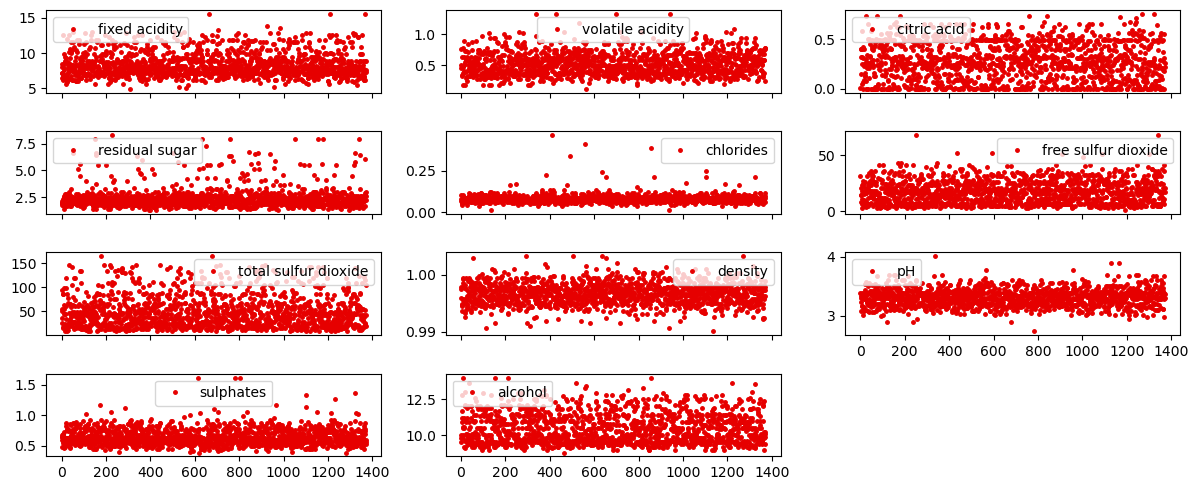

In [20]:
# For all Numerical columnn for all rows 
df_test.plot(lw=0, marker=".", subplots=True, layout=(-1, 3),
          figsize=(12,5), markersize=5,color='#e60000')
plt.tight_layout()

<div class="alert alert-block alert-info" style="background-color:#4d0000;color:white;border-color:black;width:80%;margin: auto;text-align: center;">
<b>Insight:</b> Values in each subpots appear to be continous in range</div>

## <b><div style='padding:15px;background-color:#800000;color:#DEB078;border-radius:2px;font-size:110%;text-align: center'>5 | Target Variable Analysis</div></b>

### <b><span style='color:#DEB078'>5.1 |</span><span style='color:#990012'> For Original Data</span></b>

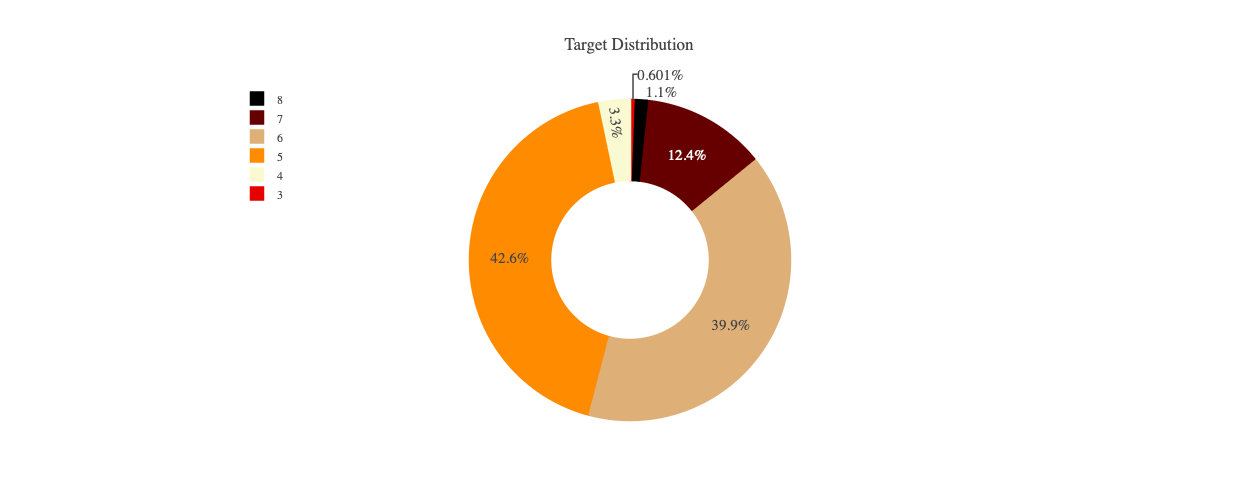

In [21]:
target=df_original[['quality']].value_counts(normalize=True).sort_index().round(decimals=3)*100

pal, color=['#e60000','#FAFAD2','#FF8C00','#DEB078','#660000','black'], ['#e60000','#FAFAD2','#FF8C00','#DEB078','#660000','black']
fig=go.Figure()

fig.add_trace(go.Pie(labels=target.index, values=target, hole=.5, 
                     showlegend=True,sort=False, 
                     marker=dict(colors=color,line=dict(color=pal,width=2.5)),
                     hovertemplate = "%{label} Transported: %{value:.2f}%<extra></extra>"))

fig.update_layout(template=temp, title='Target Distribution', 
                  legend=dict(traceorder='reversed',y=1.05,x=0),
                  uniformtext_minsize=15, uniformtext_mode='hide',height=500)
fig.show()


<div class="alert alert-block alert-info" style="background-color:#4d0000;color:white;border-color:black;width:80%;margin: auto;text-align: center;">
<b>Insight:</b> Most of the drinks have Rating 5 drinks followed by rating 6 & 7 </div>

### <b><span style='color:#DEB078'>5.2 |</span><span style='color:#990012'> For Training Data</span></b>

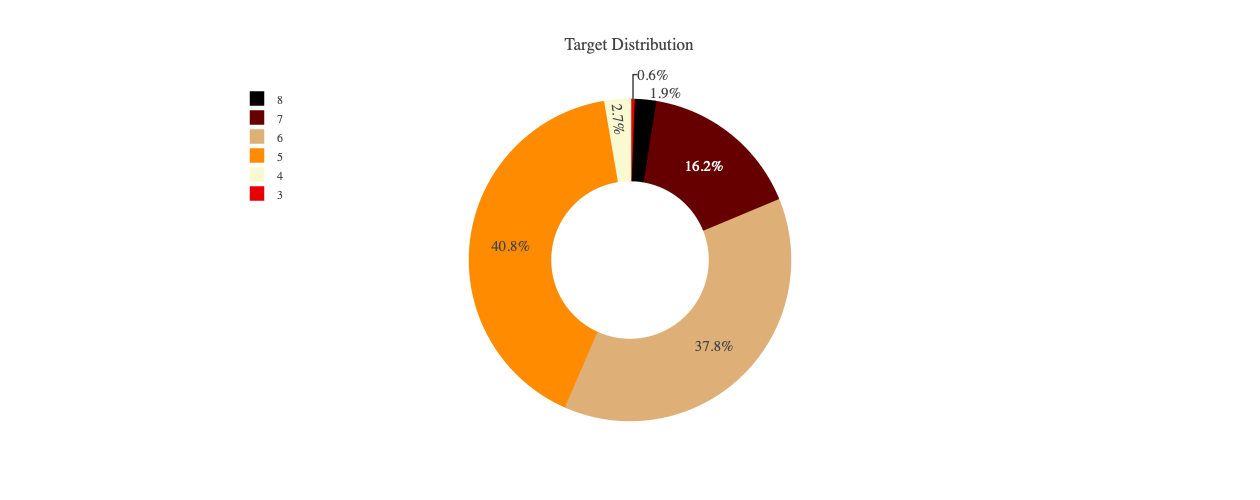

In [22]:

target=df_train[['quality']].value_counts(normalize=True).sort_index().round(decimals=3)*100

pal, color=['#e60000','#FAFAD2','#FF8C00','#DEB078','#660000','black'], ['#e60000','#FAFAD2','#FF8C00','#DEB078','#660000','black']
fig=go.Figure()

fig.add_trace(go.Pie(labels=target.index, values=target, hole=.5, 
                     showlegend=True,sort=False, 
                     marker=dict(colors=color,line=dict(color=pal,width=2.5)),
                     hovertemplate = "%{label} Transported: %{value:.2f}%<extra></extra>"))

fig.update_layout(template=temp, title='Target Distribution', 
                  legend=dict(traceorder='reversed',y=1.05,x=0),
                  uniformtext_minsize=15, uniformtext_mode='hide',height=500)
fig.show()



<div class="alert alert-block alert-info" style="background-color:#4d0000;color:white;border-color:black;width:80%;margin: auto;text-align: center;">
<b>Insight:</b> Most of the drinks have Rating 5 drinks followed by rating 6 & 7 </div>

## <b><div style='padding:15px;background-color:#800000;color:#DEB078;border-radius:2px;font-size:110%;text-align: center'>6 | Univariate Analysis</div></b>

### <b><span style='color:#DEB078'>6.1 |</span><span style='color:#990012'> Summary for Columns (Describe)</span></b>

In [23]:
df_original.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

In [24]:
df_train.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    2056.000000       2056.000000  2056.000000     2056.000000   
mean        8.365175          0.527601     0.265058        2.398881   
std         1.705390          0.173164     0.188267        0.858824   
min         5.000000          0.180000     0.000000        1.200000   
25%         7.200000          0.390000     0.090000        1.900000   
50%         7.950000          0.520000     0.250000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     0.760000       14.000000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  2056.000000          2056.000000           2056.000000  2056.000000   
mean      0.081856            16.955982             49.236868     0.996748   
std       0.023729            10.009710             32.961141     0.001827   
min       0.012000             1.000000              7.000000     0.990070   
25%       0.071000             8.000000             22.000000     0.995600   
50%       0.079000            16.000000             44.000000     0.996700   
75%       0.090000            24.000000             65.000000     0.997800   
max       0.414000            68.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  2056.000000  2056.000000  2056.000000  2056.000000  
mean      3.310569     0.641308    10.414972     5.720817  
std       0.142321     0.137942     1.028825     0.853146  
min       2.740000     0.390000     8.700000     3.000000  
25%       3.200000     0.550000     9.500000     5.000000  
50%       3.310000     0.610000    10.100000     6.000000  
75%       3.390000     0.720000    11.000000     6.000000  
max       3.780000     1.950000    14.000000     8.000000

In [25]:
df_test.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1372.000000       1372.000000  1372.000000     1372.000000   
mean        8.369606          0.524311     0.270569        2.415926   
std         1.664694          0.176942     0.185731        0.921155   
min         4.900000          0.120000     0.000000        1.300000   
25%         7.100000          0.390000     0.110000        2.000000   
50%         7.900000          0.500000     0.260000        2.200000   
75%         9.100000          0.635000     0.420000        2.500000   
max        15.600000          1.330000     0.760000        8.300000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1372.000000          1372.000000           1372.000000  1372.000000   
mean      0.081307            17.162536             49.089286     0.996670   
std       0.026566             9.974082             32.803721     0.001822   
min       0.012000             1.000000              8.000000     0.990070   
25%       0.070000             8.000000             23.000000     0.995380   
50%       0.078000            16.000000             43.000000     0.996600   
75%       0.087000            24.000000             66.000000     0.997800   
max       0.467000            68.000000            165.000000     1.003200   

                pH    sulphates      alcohol  
count  1372.000000  1372.000000  1372.000000  
mean      3.312223     0.647267    10.473081  
std       0.141405     0.134792     1.027170  
min       2.740000     0.390000     8.800000  
25%       3.210000     0.550000     9.600000  
50%       3.310000     0.620000    10.200000  
75%       3.390000     0.730000    11.200000  
max       4.010000     1.620000    14.000000

### <b><span style='color:#DEB078'>6.2 |</span><span style='color:#990012'> Individual Column Shape </span></b>

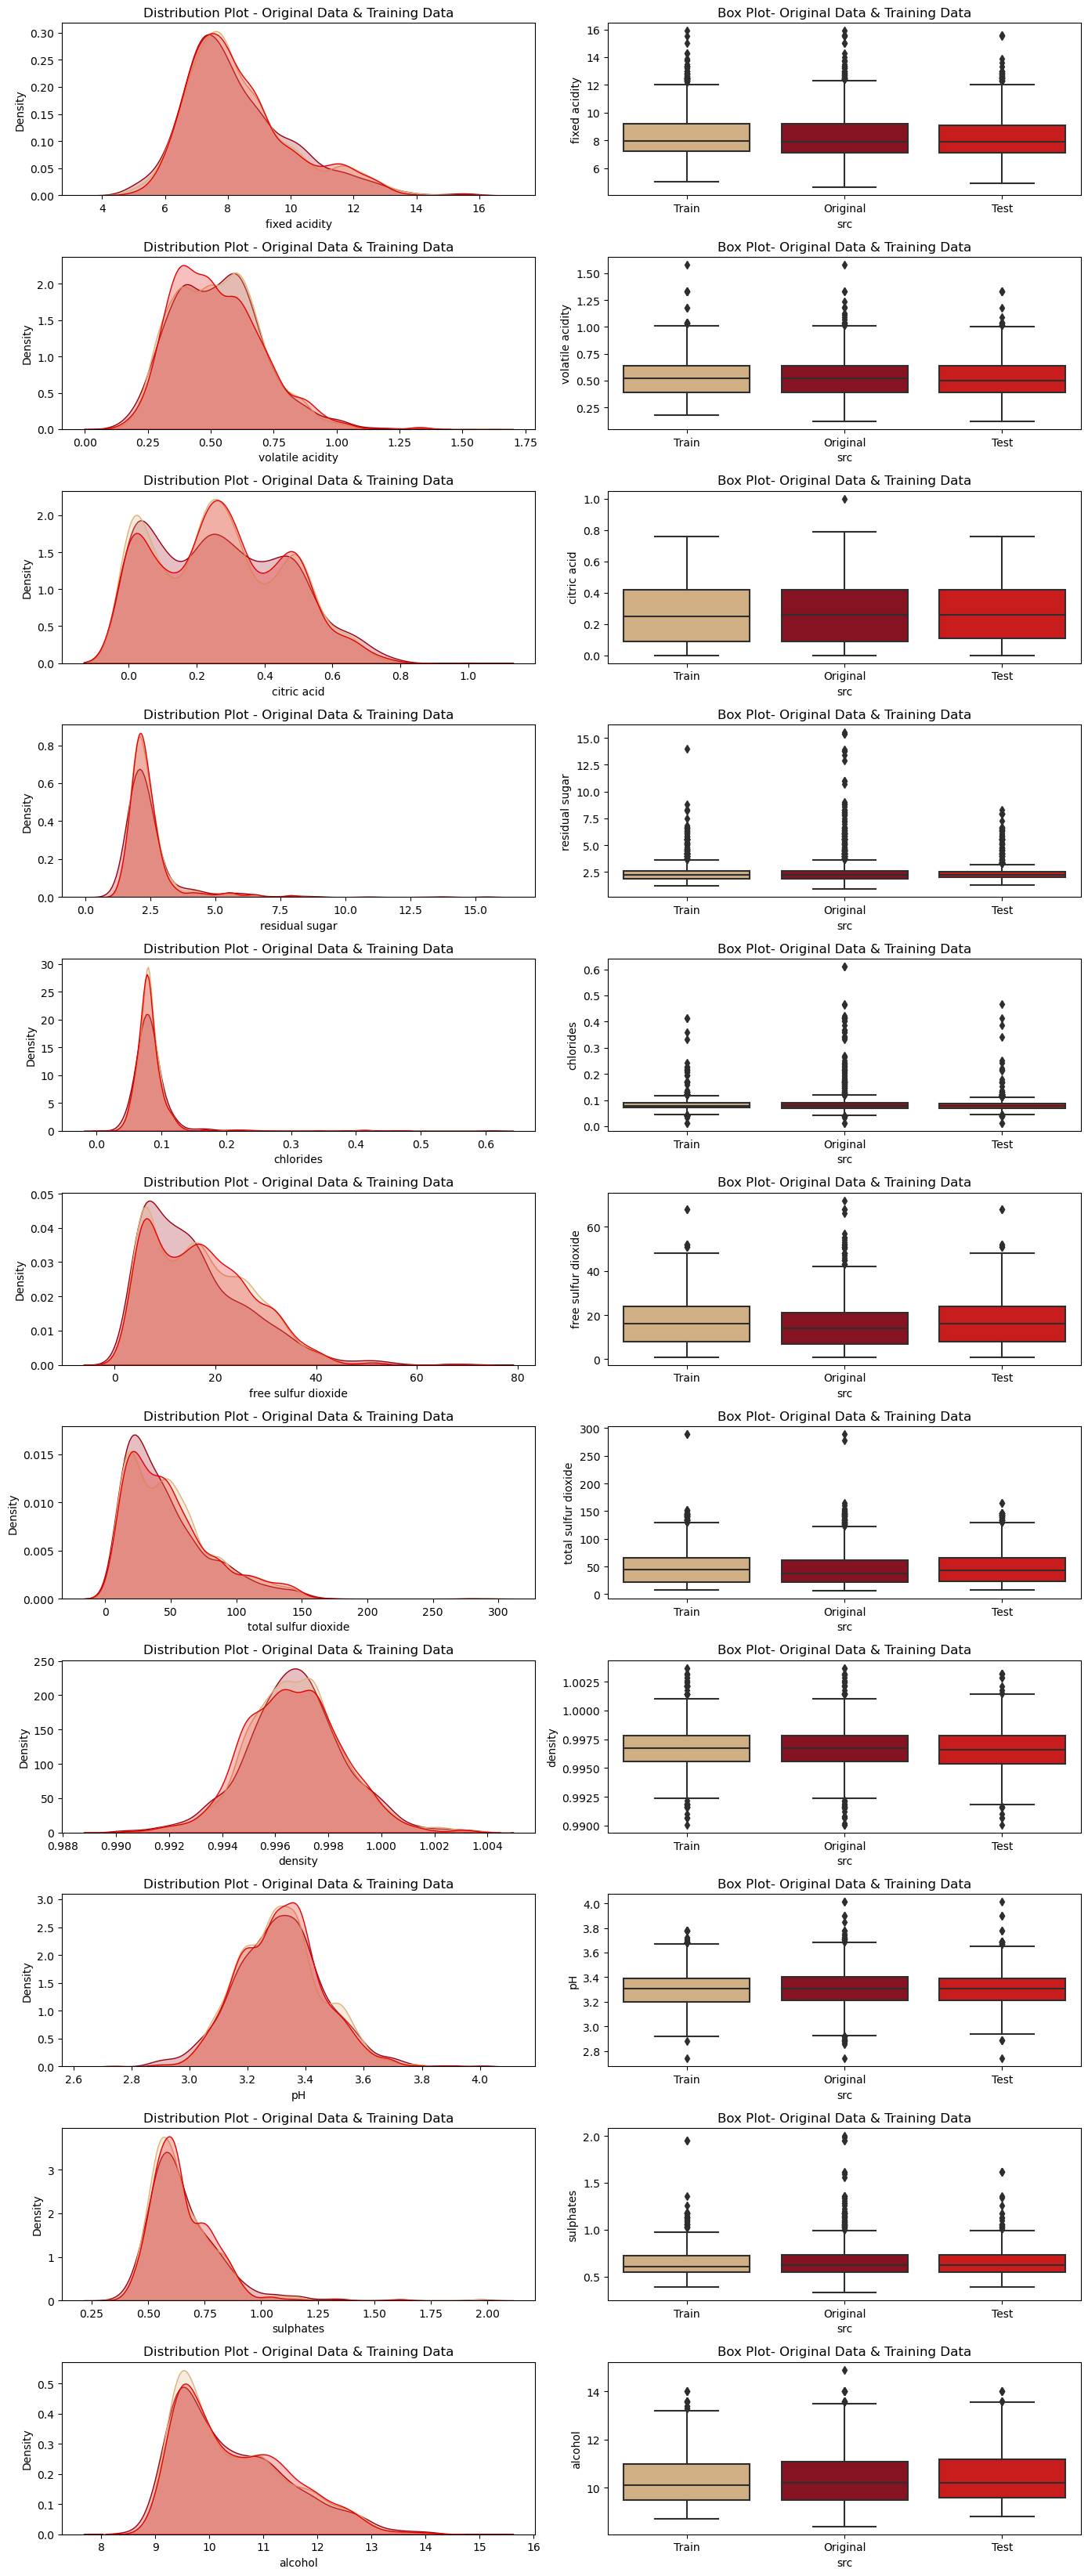

In [26]:
ncols = 2
cont_features=['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']

nrows = len(cont_features)
df_temp=pd.concat([df_train.assign(src='Train'),df_original.assign(src='Original'),df_test.assign(src='Test')])
fig, axes = plt.subplots(nrows, ncols, figsize=(14, 3*nrows))

for r in range(nrows):
    row = cont_features[r]
   
    sns.kdeplot(x=df_original[row], ax=axes[r,0], color='#990012', label='Test data', fill =True)
    sns.kdeplot(x=df_train[row], ax=axes[r,0], color='#DEB078', label='Train data' , fill =True )
    sns.kdeplot(x=df_test[row], ax=axes[r,0], color='#e60000', label='Test data', fill =True)
    
    sns.boxplot(data=df_temp, y=row,x='src' ,ax=axes[r,1],palette=['#DEB078','#990012','#e60000'])


    axes[r,0].title.set_text("Distribution Plot - Original Data & Training Data")
    axes[r,1].title.set_text("Box Plot- Original Data & Training Data")
fig.tight_layout()
plt.show()

<div class="alert alert-block alert-info" style="background-color:#4d0000;color:white;border-color:black;width:80%;margin: auto;text-align: center;">
<b>Insight:</b> Distribution is almost overlapping for all three dataset , we can combine original dataset with train dataset for training</div>

### <b><span style='color:#DEB078'>6.3 |</span><span style='color:#990012'> Individual Column Value Observation (Outlier using IQR)</span></b>

In [27]:
upper_org =df_original.quantile(0.75)+1.5 *(df_original.quantile(0.75)-df_original.quantile(0.25))
lower_org = df_original.quantile(0.25)-1.5 *(df_original.quantile(0.75)-df_original.quantile(0.25))

upper_train =df_train.quantile(0.75)+1.5 *(df_train.quantile(0.75)-df_train.quantile(0.25))
lower_train = df_train.quantile(0.25)-1.5 *(df_train.quantile(0.75)-df_train.quantile(0.25))

upper_test =df_test.quantile(0.75)+1.5 *(df_test.quantile(0.75)-df_test.quantile(0.25))
lower_test = df_test.quantile(0.25)-1.5 *(df_test.quantile(0.75)-df_test.quantile(0.25))




columns_to_be_checked=cont_features

for i in columns_to_be_checked:

    
    print('\nColumn -> ',i,'\n')
    
    x= df_original[ (df_original[i]<round(lower_org[i],2)) |  (df_original[i]>round(upper_org[i],2))][i].to_list()
    print('Skewness -> ',round(df_original[i].skew(),3) ,' | Outliers presesnt in Original Dataset -> ',len(x),'  Out of Total -> ',len(df_original))
          
    x= df_train[ (df_train[i]<round(lower_train[i],2)) |  (df_train[i]>round(upper_train[i],2))][i].to_list()
    print('Skewness -> ',round(df_train[i].skew(),3) ,' | Outliers presesnt in Training Dataset -> ',len(x),'  Out of Total -> ',len(df_train))
          
    x= df_test[ (df_test[i]<round(lower_test[i],2)) |  (df_test[i]>round(upper_test[i],2))][i].to_list()
    print('Skewness -> ',round(df_test[i].skew(),3) ,' | Outliers presesnt in Test Dataset -> ',len(x),'  Out of Total -> ',len(df_test))
          
          
    print('\n','*'*10)


Column ->  fixed acidity 

Skewness ->  0.983  | Outliers presesnt in Original Dataset ->  49   Out of Total ->  1599
Skewness ->  0.96  | Outliers presesnt in Training Dataset ->  79   Out of Total ->  2056
Skewness ->  0.998  | Outliers presesnt in Test Dataset ->  47   Out of Total ->  1372

 **********

Column ->  volatile acidity 

Skewness ->  0.672  | Outliers presesnt in Original Dataset ->  15   Out of Total ->  1599
Skewness ->  0.668  | Outliers presesnt in Training Dataset ->  15   Out of Total ->  2056
Skewness ->  0.751  | Outliers presesnt in Test Dataset ->  15   Out of Total ->  1372

 **********

Column ->  citric acid 

Skewness ->  0.318  | Outliers presesnt in Original Dataset ->  1   Out of Total ->  1599
Skewness ->  0.247  | Outliers presesnt in Training Dataset ->  0   Out of Total ->  2056
Skewness ->  0.212  | Outliers presesnt in Test Dataset ->  0   Out of Total ->  1372

 **********

Column ->  residual sugar 

Skewness ->  4.541  | Outliers presesnt in O

## <b><div style='padding:15px;background-color:#800000;color:#DEB078;border-radius:2px;font-size:110%;text-align: center'>7 | Combining Data and Relationship matrix</div></b>

### <b><span style='color:#DEB078'>7.1 |</span><span style='color:#990012'> Combining Original and Training Data</span></b>

In [28]:
df_combined=pd.concat([df_train.assign(src='Train'),df_original.assign(src='Original')]).reset_index(drop=True)

### <b><span style='color:#DEB078'>7.2 |</span><span style='color:#990012'> Creating Relation Matrix and Graph For Combined Training Data</span></b>

In [28]:
temp_corr_combined=df_combined.corr()
temp_corr_combined

fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.290324     0.684651   
volatile acidity          -0.290324          1.000000    -0.570542   
citric acid                0.684651         -0.570542     1.000000   
residual sugar             0.153535         -0.032463     0.141240   
chlorides                  0.116914          0.048499     0.171745   
free sulfur dioxide       -0.199181          0.023804    -0.132525   
total sulfur dioxide      -0.121574          0.080164    -0.032329   
density                    0.639166         -0.031069     0.371350   
pH                        -0.677648          0.239801    -0.550489   
sulphates                  0.160799         -0.301140     0.285574   
alcohol                   -0.041807         -0.209927     0.094766   
quality                    0.095856         -0.292685     0.177167   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity               0.153535   0.116914            -0.199181   
volatile acidity           -0.032463   0.048499             0.023804   
citric acid                 0.141240   0.171745            -0.132525   
residual sugar              1.000000   0.068625             0.059609   
chlorides                   0.068625   1.000000            -0.018612   
free sulfur dioxide         0.059609  -0.018612             1.000000   
total sulfur dioxide        0.097801   0.027101             0.651757   
density                     0.315474   0.208535            -0.046610   
pH                         -0.092510  -0.204285             0.106796   
sulphates                   0.018933   0.255843            -0.001211   
alcohol                     0.056037  -0.183566            -0.094088   
quality                     0.025080  -0.092998            -0.053199   

                      total sulfur dioxide   density        pH  sulphates  \
fixed acidity                    -0.121574  0.639166 -0.677648   0.160799   
volatile acidity                  0.080164 -0.031069  0.239801  -0.301140   
citric acid                      -0.032329  0.371350 -0.550489   0.285574   
residual sugar                    0.097801  0.315474 -0.092510   0.018933   
chlorides                         0.027101  0.208535 -0.204285   0.255843   
free sulfur dioxide               0.651757 -0.046610  0.106796  -0.001211   
total sulfur dioxide              1.000000  0.093949 -0.039442  -0.058177   
density                           0.093949  1.000000 -0.366573   0.072234   
pH                               -0.039442 -0.366573  1.000000  -0.122021   
sulphates                        -0.058177  0.072234 -0.122021   1.000000   
alcohol                          -0.268842 -0.419517  0.162566   0.170167   
quality                          -0.205870 -0.162207 -0.016558   0.305820   

                       alcohol   quality  
fixed acidity        -0.041807  0.095856  
volatile acidity     -0.209927 -0.292685  
citric acid           0.094766  0.177167  
residual sugar        0.056037  0.025080  
chlorides            -0.183566 -0.092998  
free sulfur dioxide  -0.094088 -0.053199  
total sulfur dioxide -0.268842 -0.205870  
density              -0.419517 -0.162207  
pH                    0.162566 -0.016558  
sulphates             0.170167  0.305820  
alcohol               1.000000  0.478666  
quality               0.478666  1.000000

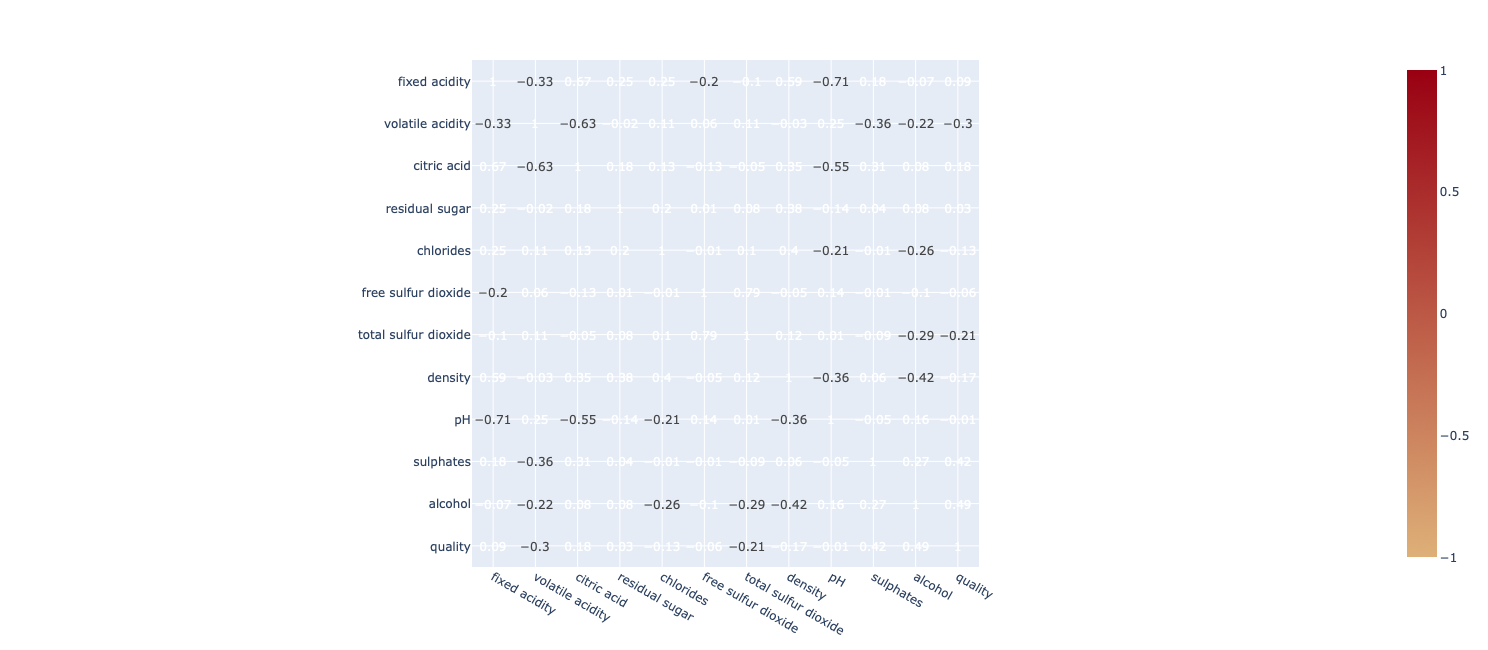

In [29]:
fig = px.imshow(df_combined.corr(method='spearman').round(2),zmin=-1,zmax=1, text_auto=True,width=1200,height=650,aspect=None,color_continuous_scale=['#DEB078','#990012'])
fig.show()

### <b><span style='color:#DEB078'>7.3 |</span><span style='color:#990012'> Creating Relation Matrix and Graph For Test Data</span></b>

In [30]:
temp_corr_test=df_combined.corr()
temp_corr_test

fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.290324     0.684651   
volatile acidity          -0.290324          1.000000    -0.570542   
citric acid                0.684651         -0.570542     1.000000   
residual sugar             0.153535         -0.032463     0.141240   
chlorides                  0.116914          0.048499     0.171745   
free sulfur dioxide       -0.199181          0.023804    -0.132525   
total sulfur dioxide      -0.121574          0.080164    -0.032329   
density                    0.639166         -0.031069     0.371350   
pH                        -0.677648          0.239801    -0.550489   
sulphates                  0.160799         -0.301140     0.285574   
alcohol                   -0.041807         -0.209927     0.094766   
quality                    0.095856         -0.292685     0.177167   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity               0.153535   0.116914            -0.199181   
volatile acidity           -0.032463   0.048499             0.023804   
citric acid                 0.141240   0.171745            -0.132525   
residual sugar              1.000000   0.068625             0.059609   
chlorides                   0.068625   1.000000            -0.018612   
free sulfur dioxide         0.059609  -0.018612             1.000000   
total sulfur dioxide        0.097801   0.027101             0.651757   
density                     0.315474   0.208535            -0.046610   
pH                         -0.092510  -0.204285             0.106796   
sulphates                   0.018933   0.255843            -0.001211   
alcohol                     0.056037  -0.183566            -0.094088   
quality                     0.025080  -0.092998            -0.053199   

                      total sulfur dioxide   density        pH  sulphates  \
fixed acidity                    -0.121574  0.639166 -0.677648   0.160799   
volatile acidity                  0.080164 -0.031069  0.239801  -0.301140   
citric acid                      -0.032329  0.371350 -0.550489   0.285574   
residual sugar                    0.097801  0.315474 -0.092510   0.018933   
chlorides                         0.027101  0.208535 -0.204285   0.255843   
free sulfur dioxide               0.651757 -0.046610  0.106796  -0.001211   
total sulfur dioxide              1.000000  0.093949 -0.039442  -0.058177   
density                           0.093949  1.000000 -0.366573   0.072234   
pH                               -0.039442 -0.366573  1.000000  -0.122021   
sulphates                        -0.058177  0.072234 -0.122021   1.000000   
alcohol                          -0.268842 -0.419517  0.162566   0.170167   
quality                          -0.205870 -0.162207 -0.016558   0.305820   

                       alcohol   quality  
fixed acidity        -0.041807  0.095856  
volatile acidity     -0.209927 -0.292685  
citric acid           0.094766  0.177167  
residual sugar        0.056037  0.025080  
chlorides            -0.183566 -0.092998  
free sulfur dioxide  -0.094088 -0.053199  
total sulfur dioxide -0.268842 -0.205870  
density              -0.419517 -0.162207  
pH                    0.162566 -0.016558  
sulphates             0.170167  0.305820  
alcohol               1.000000  0.478666  
quality               0.478666  1.000000

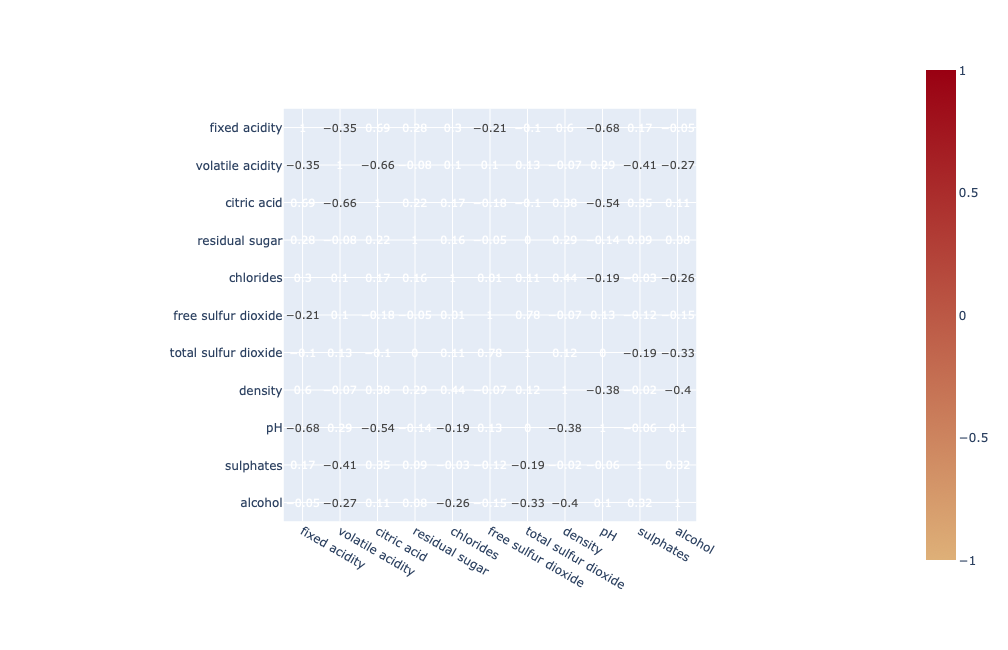

In [31]:
fig = px.imshow(df_test.corr(method='spearman').round(2),zmin=-1,zmax=1, text_auto=True,width=1200,height=650,aspect=None,color_continuous_scale=['#DEB078','#990012'])
fig.show()

<div class="alert alert-block alert-info" style="background-color:#4d0000;color:white;border-color:black;width:80%;margin: auto;text-align: center;">
<b>Insight:</b> Leaving Quality Column , we can see approx same relation in Combined and Test Data</div>

## <b><div style='padding:15px;background-color:#800000;color:#DEB078;border-radius:2px;font-size:110%;text-align: center'>8 | Multivariate Analysis wrt Quality</div></b>

### <b><span style='color:#DEB078'>8.1 |</span><span style='color:#990012'> Relation with Quality in terms of corr coeficient (Combined Training and Org Data)</span></b>

In [32]:
# Used spearman since quality exhibits ordinal variable with categorical behaviours
temp_corr_score=df_combined.corr(method='spearman').loc[['quality']]
temp_corr_score

fixed acidity  volatile acidity  citric acid  residual sugar  \
quality       0.087609         -0.304847     0.180403        0.034181   

         chlorides  free sulfur dioxide  total sulfur dioxide   density  \
quality  -0.125796            -0.063213             -0.211209 -0.174266   

               pH  sulphates   alcohol  quality  
quality -0.006945   0.420685  0.492523      1.0

In [33]:
# Observing relationship type with corr values

temp_corr_score.drop(columns='quality',inplace=True)
strong=[]
moderate=[]
weak=[]
no_relationship=[]
for y in temp_corr_score.columns:
    p=temp_corr_score[y][0]
    if p >= 0.75 or p <= -0.75:
        strong.append(y)
    elif p >= 0.50 or p <= -0.50:
        moderate.append(y)
    elif p >= 0.25 or p <= -0.25:
        weak.append(y)
    else :
        no_relationship.append(y)

In [34]:
print('\nStrong -> ',strong)
print('\nModerate -> ',moderate)
print('\nWeak -> ',weak)
print('\nNo_relationship -> ',no_relationship)


Strong ->  []

Moderate ->  []

Weak ->  ['volatile acidity', 'sulphates', 'alcohol']

No_relationship ->  ['fixed acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH']


<div class="alert alert-block alert-info" style="background-color:#4d0000;color:white;border-color:black;width:80%;margin: auto;text-align: center;">
<b>Insight:</b> No strong relationship exist for quality , we can see 3 columns (volatile acidity, sulphates, alcohol) showing weak to moderate relationship with quality </div>

### <b><span style='color:#DEB078'>8.2 |</span><span style='color:#990012'> Relation with Quality using pairplot (Combined Training and Org Data)</span></b>

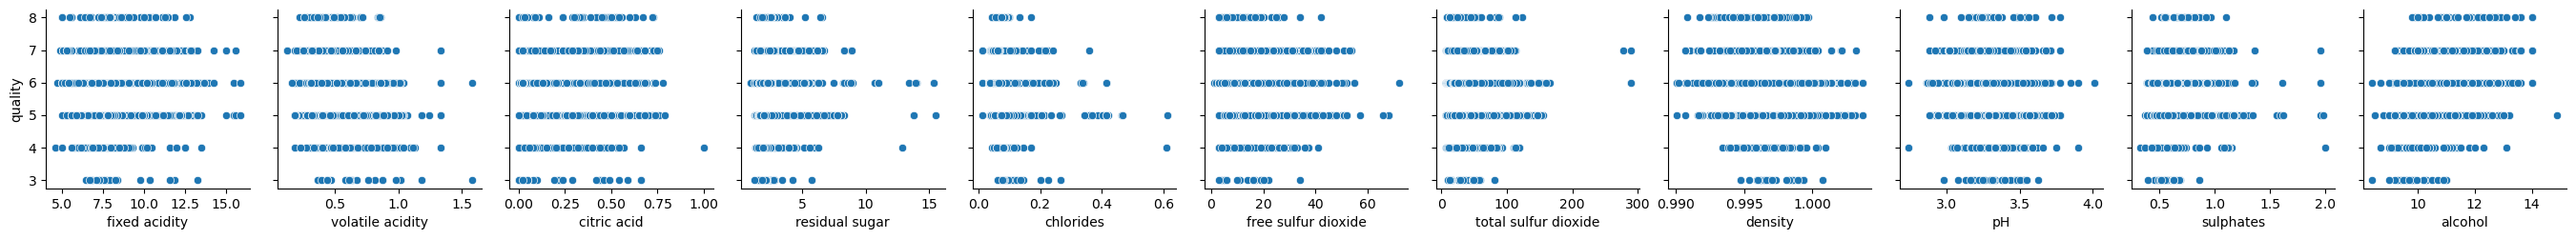

In [35]:
sns.pairplot(data=df_combined,
                  y_vars='quality',
                  x_vars=df_combined.drop(columns=['quality','src']).columns
            
)
                  
plt.show()


<div class="alert alert-block alert-info" style="background-color:#4d0000;color:white;border-color:black;width:80%;margin: auto;text-align: center;">
<b>Insight</b><br>  Looking at alcohol vs quality it seems drink with higher alcohol content tends to have high ratings<br>
 Looking at volatile acidity it seems drink with lower volatile acidity content tends to have higher ratings<br>
 Looking at sulphates vs quality it seems drink with higher alcohol content tends to have high ratings</div>

### <b><span style='color:#DEB078'>8.3 |</span><span style='color:#990012'> Relation with Quality using boxplot (Combined Training and Org Data)</span></b>

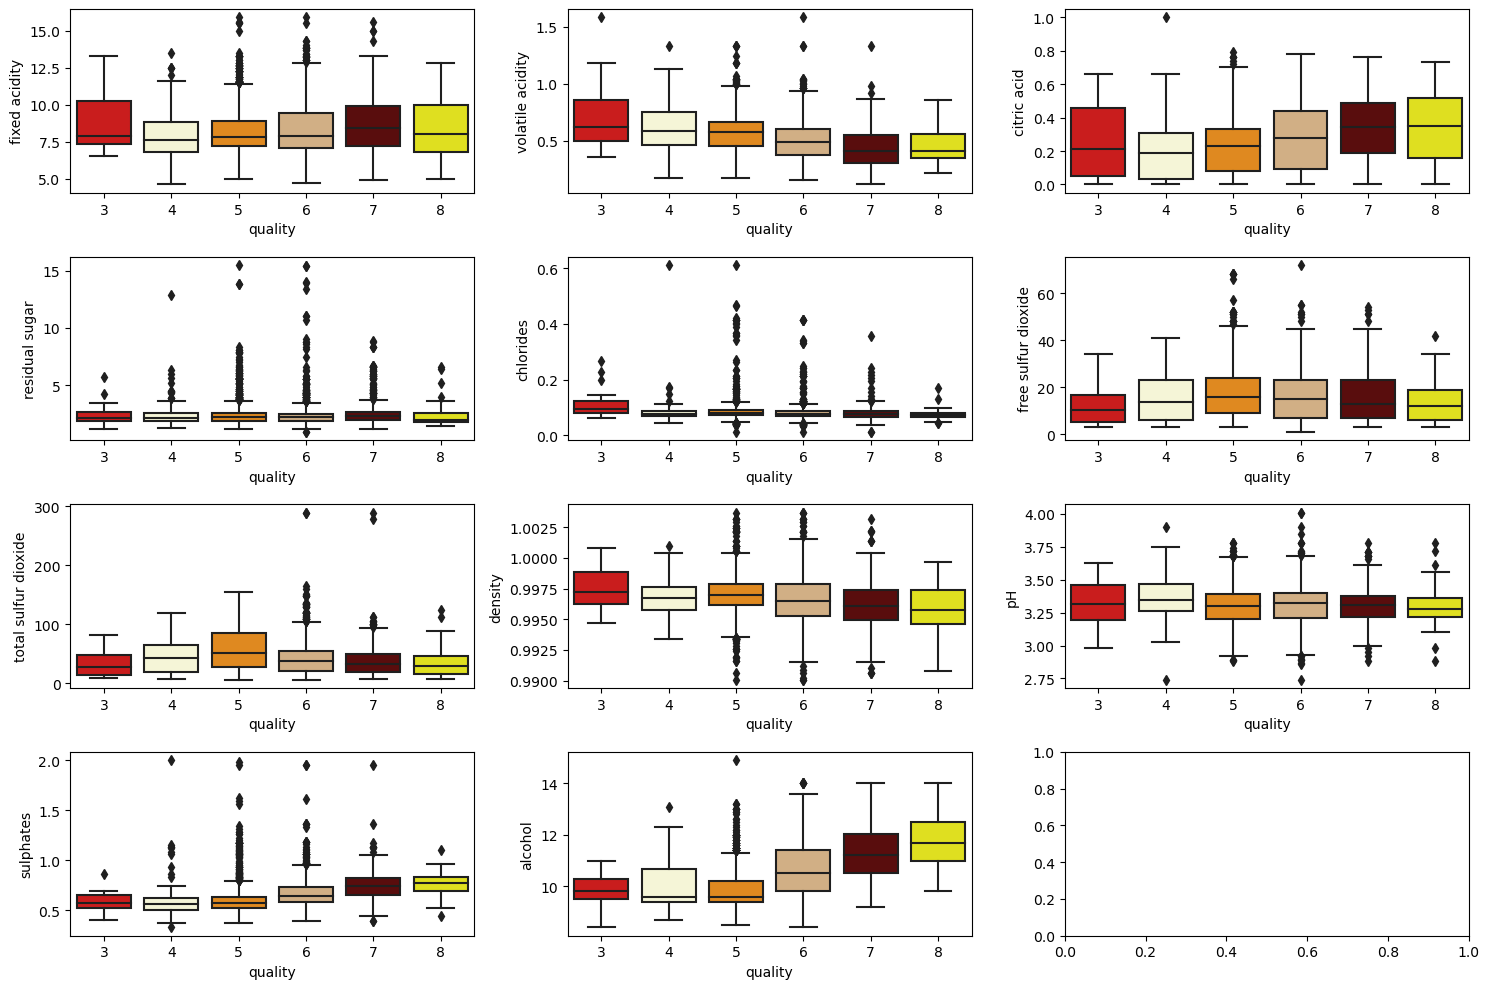

In [36]:
cont_features=['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']

y=3
x=math.ceil(len(cont_features)/y)

plt.subplots(x,y,figsize=(15,10))

for i in range(1,len(cont_features)+1) :
    plt.subplot(x,y,i)
    sns.boxplot(data=df_combined,y=cont_features[i-1],x='quality',palette=['#e60000','#FAFAD2','#FF8C00','#DEB078','#660000','yellow'])
plt.tight_layout()    
plt.show()

<div class="alert alert-block alert-info" style="background-color:#4d0000;color:white;border-color:black;width:80%;margin: auto;text-align: center;">
<b>Insight</b><br>  * Median of high rating drinks is higher in sulphates, alcohol and citric acid<br>
* Median of high rating drinks is lower in chlorides, density and residual sugar 

## <b><div style='padding:15px;background-color:#800000;color:#DEB078;border-radius:2px;font-size:110%;text-align: center'>9 | Multivariate Analysis leaving Quality</div></b>

### <b><span style='color:#DEB078'>9.1 |</span><span style='color:#990012'> Other Interesting Relationships For Training Data (Original & Training Data Combined)</span></b>

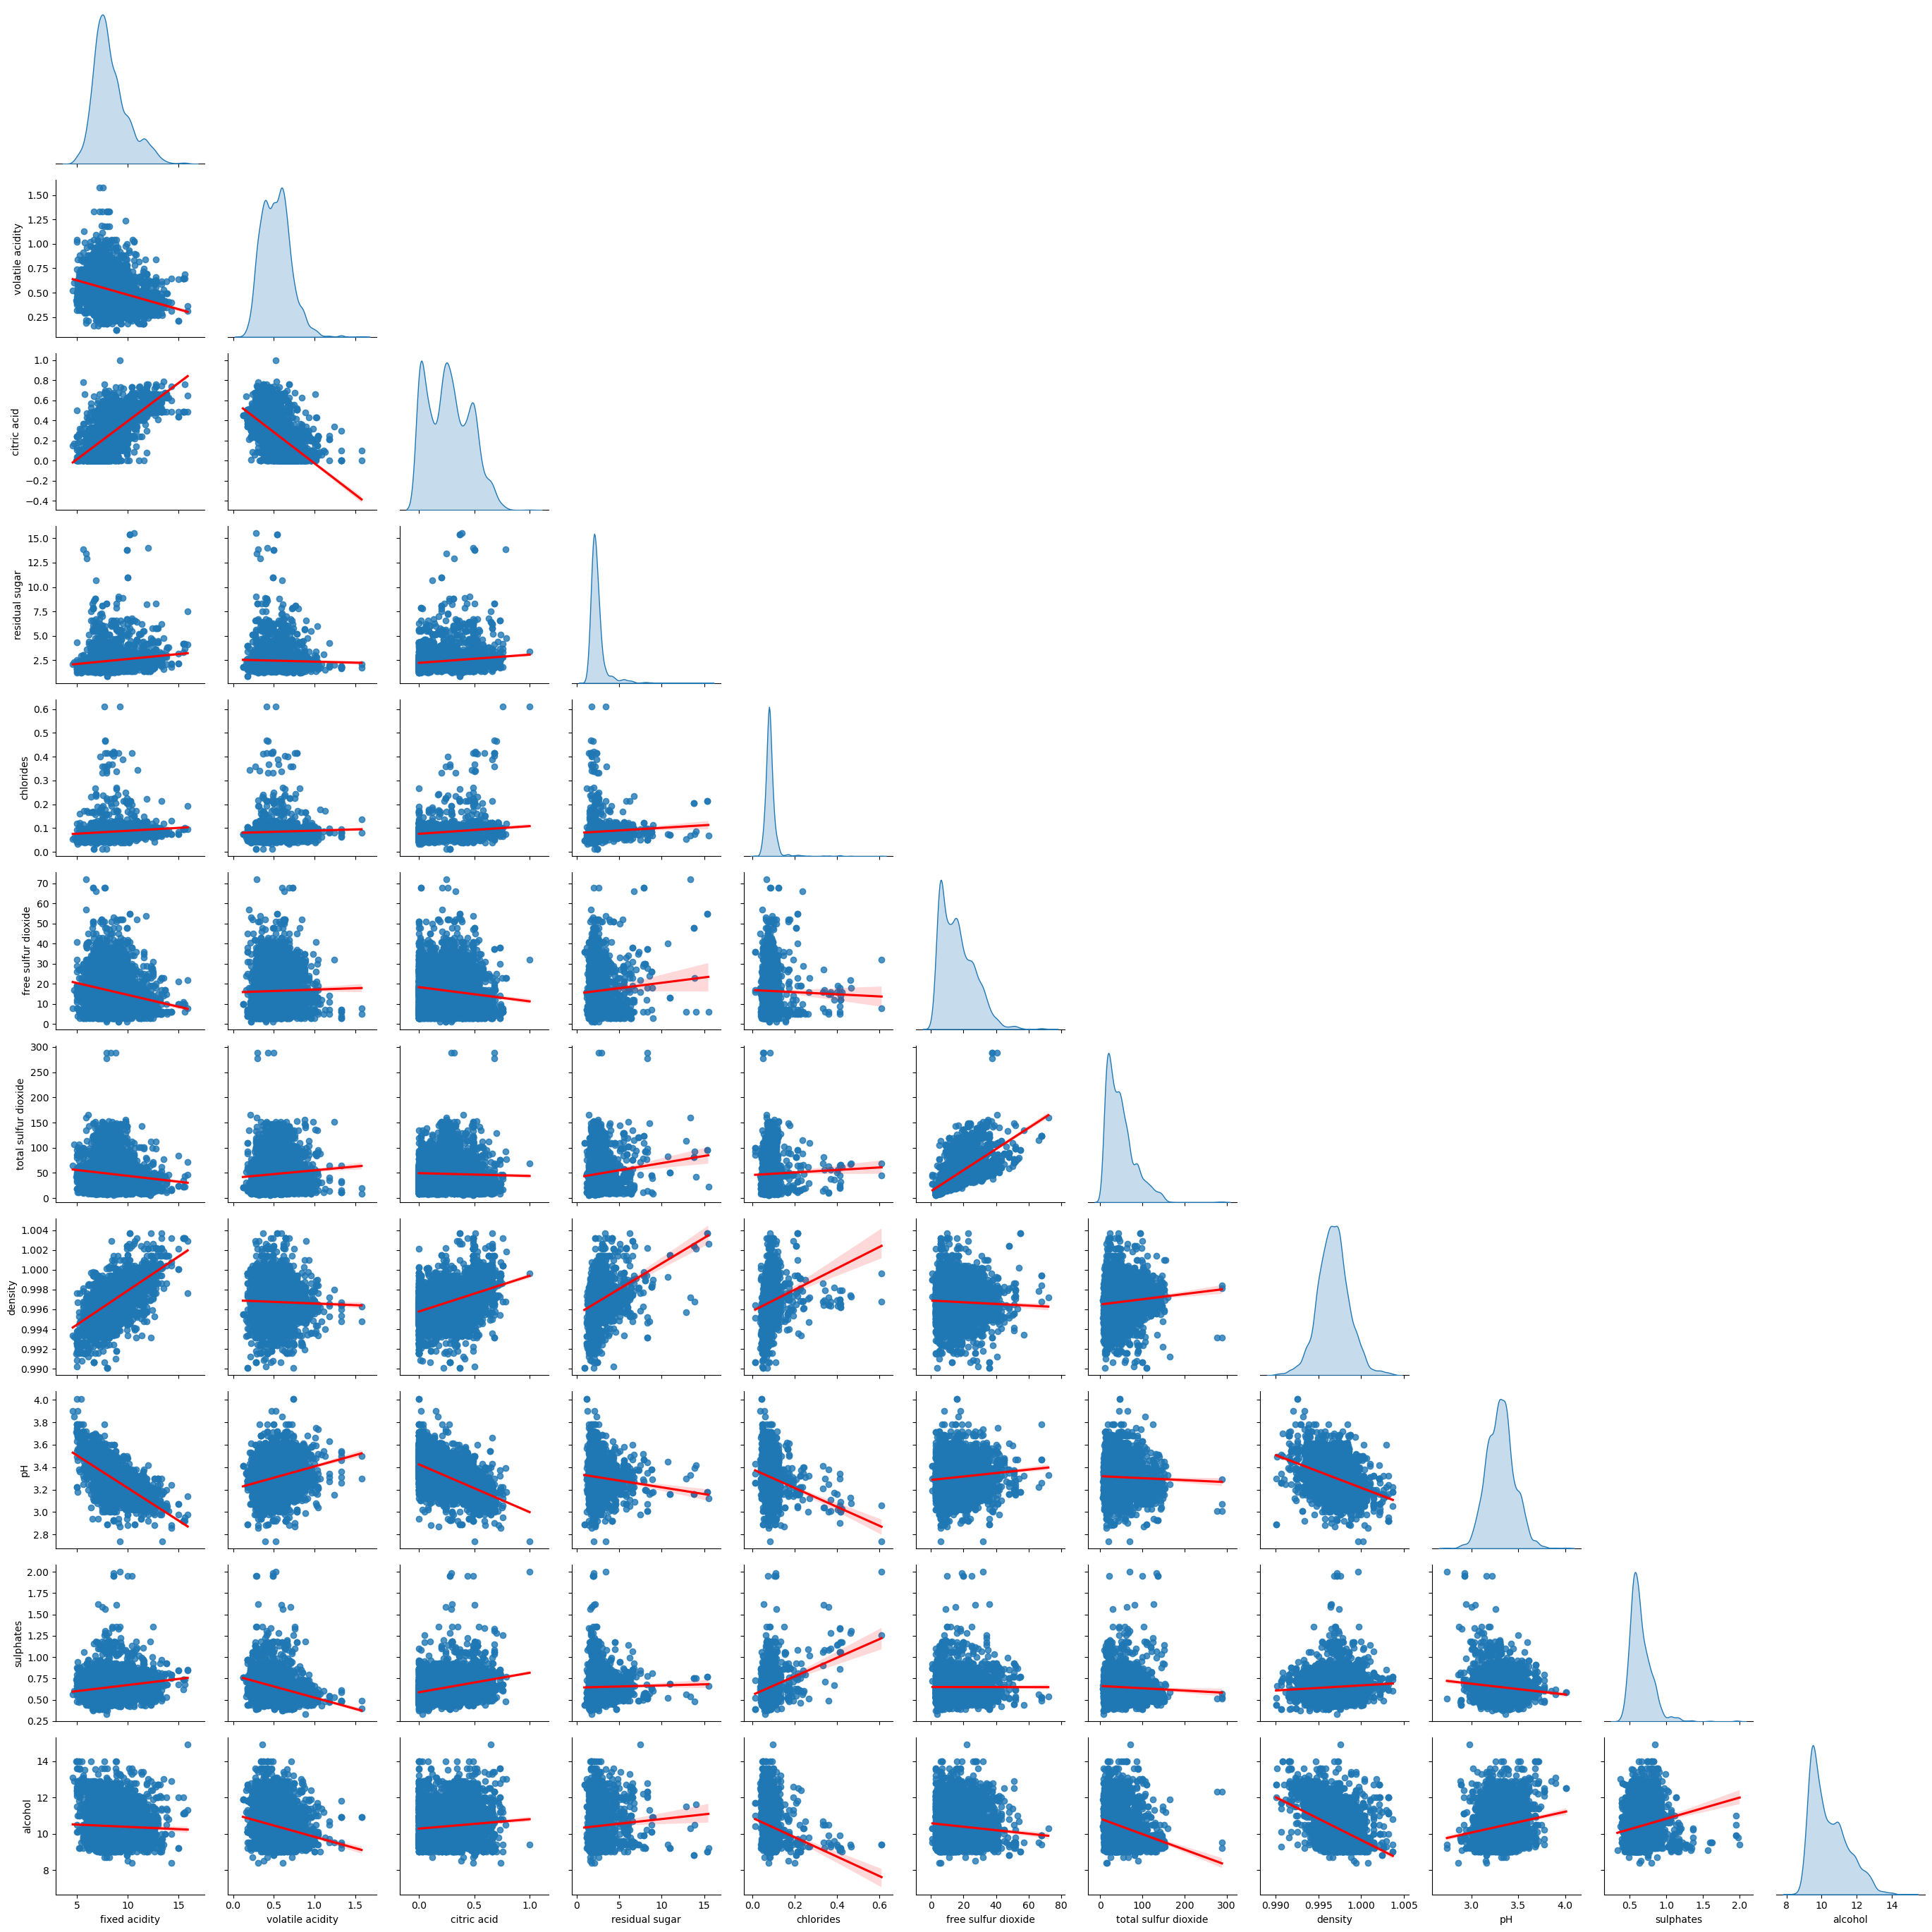

In [37]:
sns.pairplot(df_combined.drop(columns=['quality','src']),kind="reg",diag_kind='kde',plot_kws={'line_kws':{'color':'red'}},corner=True)
plt.tight_layout()
plt.show()

In [38]:
temp_corr=df_combined.corr()
temp_corr.drop(columns=['quality'],index=['quality'],inplace=True)
res = [(a, b) for idx, a in enumerate(temp_corr.index) for b in temp_corr.index[idx + 1:]]

strong=[]
moderate=[]
weak=[]
no_relationship=[]
for x,y in res:
    p=temp_corr[x][y]
    if p >= 0.75 or p <= -0.75:
        strong.append((x,y))
    elif p >= 0.50 or p <= -0.50:
        moderate.append((x,y))
    elif p >= 0.25 or p <= -0.25:
        weak.append((x,y))
    else :
        no_relationship.append((x,y))
    
print('\nStrong -> ',strong)
print('\nModerate -> ',moderate)
print('\nWeak -> ',weak)
#print('\nNo_relationship -> ',no_relationship)


Strong ->  []

Moderate ->  [('fixed acidity', 'citric acid'), ('fixed acidity', 'density'), ('fixed acidity', 'pH'), ('volatile acidity', 'citric acid'), ('citric acid', 'pH'), ('free sulfur dioxide', 'total sulfur dioxide')]

Weak ->  [('fixed acidity', 'volatile acidity'), ('volatile acidity', 'sulphates'), ('citric acid', 'density'), ('citric acid', 'sulphates'), ('residual sugar', 'density'), ('chlorides', 'sulphates'), ('total sulfur dioxide', 'alcohol'), ('density', 'pH'), ('density', 'alcohol')]


<div class="alert alert-block alert-info" style="background-color:#4d0000;color:white;border-color:black;width:80%;margin: auto;text-align: center;">
<b>Insight</b><br>  * Fixed Acidity shares moderate raltaionship with citric acid, density and pH .<br>
* volatile acidity has moderate raltaionship with citric acid.<br>
* citric acid has moderate relationship with pH.<br>
* free sulfur dioxide has moderate raltaionship with total sulfur dioxide .<br>

### <b><span style='color:#DEB078'>9.2 |</span><span style='color:#990012'> Other Interesting Relationships For Test Data</span></b>

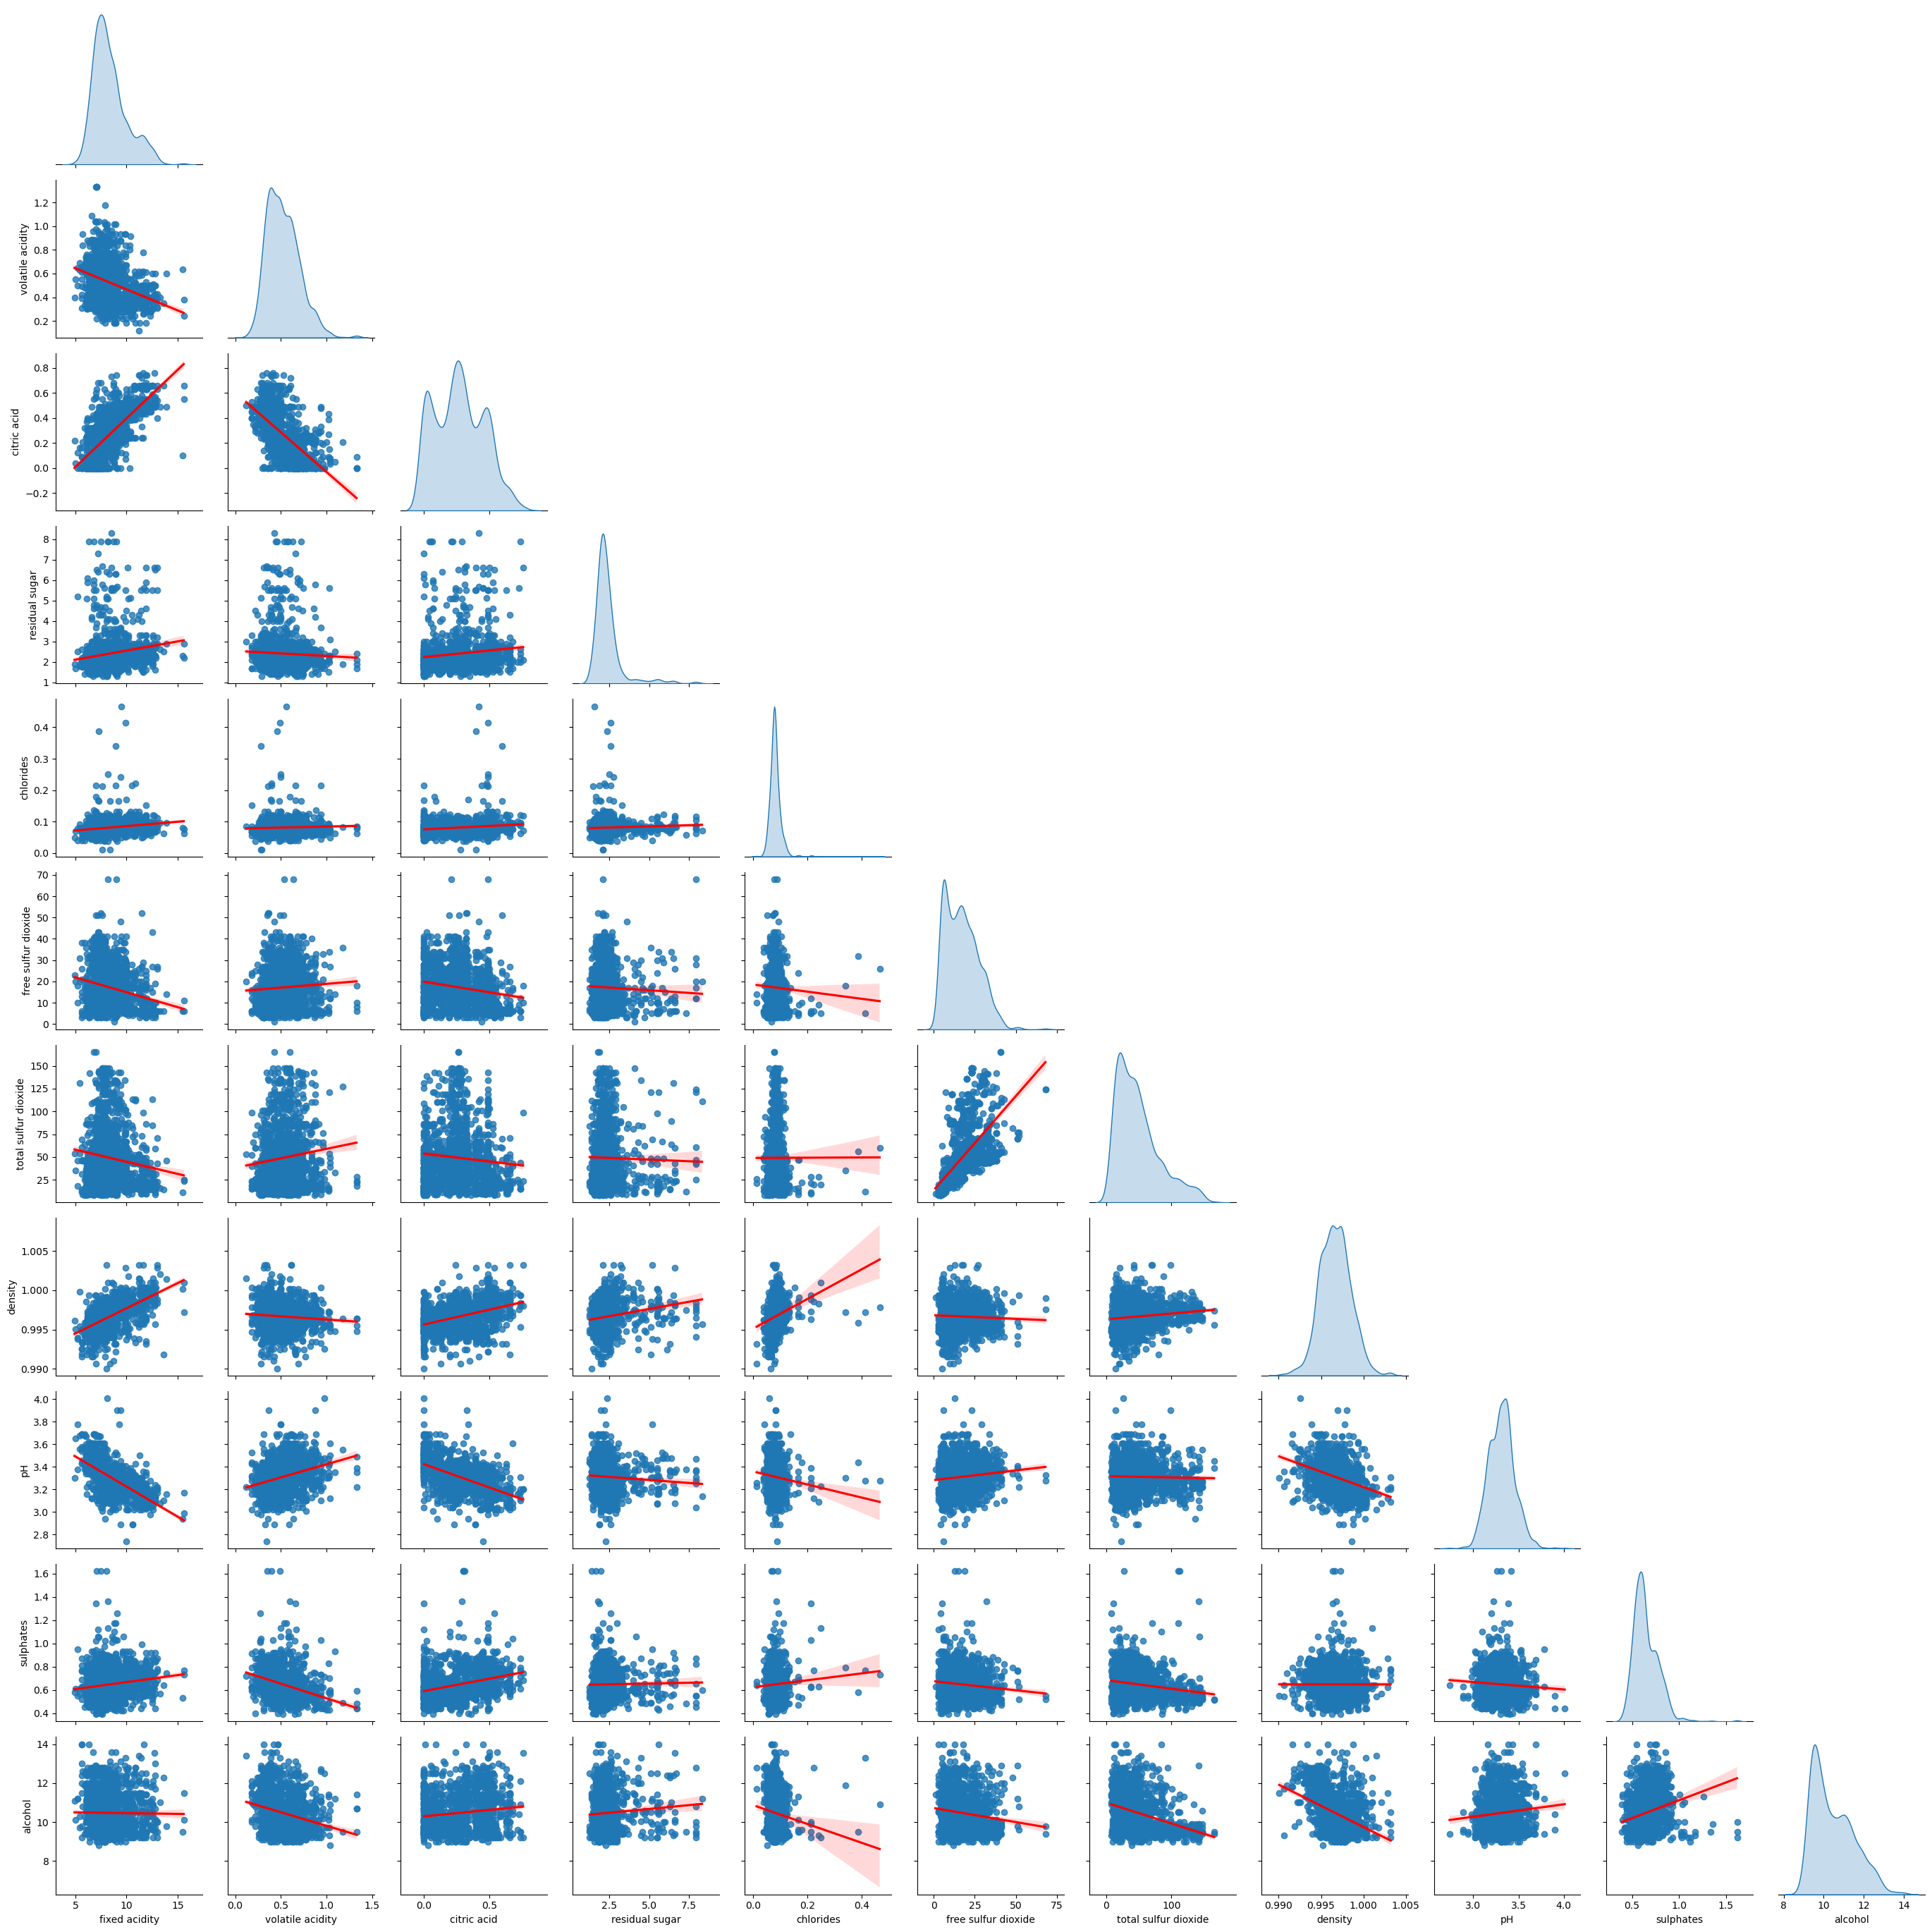

In [39]:
sns.pairplot(df_test,kind="reg",diag_kind='kde',plot_kws={'line_kws':{'color':'red'}},corner=True)
plt.tight_layout()
plt.show()

In [40]:
temp_corr=df_test.corr()
res = [(a, b) for idx, a in enumerate(temp_corr.index) for b in temp_corr.index[idx + 1:]]

strong=[]
moderate=[]
weak=[]
no_relationship=[]
for x,y in res:
    p=temp_corr[x][y]
    if p >= 0.75 or p <= -0.75:
        strong.append((x,y))
    elif p >= 0.50 or p <= -0.50:
        moderate.append((x,y))
    elif p >= 0.25 or p <= -0.25:
        weak.append((x,y))
    else :
        no_relationship.append((x,y))
    
print('\nStrong -> ',strong)
print('\nModerate -> ',moderate)
print('\nWeak -> ',weak)
#print('\nNo_relationship -> ',no_relationship)


Strong ->  []

Moderate ->  [('fixed acidity', 'citric acid'), ('fixed acidity', 'density'), ('fixed acidity', 'pH'), ('volatile acidity', 'citric acid'), ('citric acid', 'pH'), ('free sulfur dioxide', 'total sulfur dioxide')]

Weak ->  [('fixed acidity', 'volatile acidity'), ('volatile acidity', 'pH'), ('volatile acidity', 'sulphates'), ('citric acid', 'density'), ('citric acid', 'sulphates'), ('chlorides', 'density'), ('total sulfur dioxide', 'alcohol'), ('density', 'pH'), ('density', 'alcohol')]


<div class="alert alert-block alert-info" style="background-color:#4d0000;color:white;border-color:black;width:80%;margin: auto;text-align: center;">
<b>Insight</b><br>  * Fixed Acidity shares moderate raltaionship with citric acid, density and pH .<br>
* volatile acidity has moderate raltaionship with citric acid.<br>
* citric acid has moderate relationship with pH.<br>
* free sulfur dioxide has moderate raltaionship with total sulfur dioxide .<br>

## <b><div style='padding:15px;background-color:#800000;color:#DEB078;border-radius:2px;font-size:110%;text-align: center'>10 | Analysis So Far</div></b>

* Distribution between training , test & Original data is approx same.
* Relationship between variables is similliar among test and combined data (training & Original data)

## <b><div style='padding:15px;background-color:#800000;color:#DEB078;border-radius:2px;font-size:110%;text-align: center'>11 | Model Fitting using AutoML (Lazypredict) </div></b>

In [41]:
df_original.shape

(1599, 12)

In [42]:
df_train.shape

(2056, 12)

In [43]:
df_combined.shape

(3655, 13)

In [43]:
X.shape

NameError: name 'X' is not defined

In [159]:
Y.shape

(3199, 1)

In [47]:
X = df_combined.drop(['quality','src'] , axis =1 )
Y = df_combined[['quality']]
Y=Y.astype('str')
X_train , X_test , Y_train , Y_test = train_test_split(X , Y, stratify=Y, random_state = 5 ,test_size =0.30)

In [162]:
Y

quality
0          6
1          6
2          7
3          5
4          6
...      ...
3194       6
3195       6
3196       5
3197       6
3198       5

[3199 rows x 1 columns]

In [163]:
clf = LazyClassifier(verbose=0,
                     ignore_warnings=True,
                     custom_metric=None,
                     predictions=False,
                     random_state=12,
                     classifiers='all')

models, predictions = clf.fit(X_train , X_test , Y_train , Y_test)

100%|██████████| 29/29 [00:09<00:00,  3.11it/s]


* In Progress

In [164]:
models

Accuracy  Balanced Accuracy ROC AUC  F1 Score  \
Model                                                                          
NearestCentroid                    0.28               0.40    None      0.34   
AdaBoostClassifier                 0.38               0.37    None      0.41   
RandomForestClassifier             0.62               0.30    None      0.60   
ExtraTreesClassifier               0.60               0.29    None      0.58   
LGBMClassifier                     0.59               0.29    None      0.57   
GaussianNB                         0.55               0.28    None      0.54   
BaggingClassifier                  0.57               0.28    None      0.55   
LinearDiscriminantAnalysis         0.58               0.28    None      0.55   
LogisticRegression                 0.58               0.27    None      0.55   
BernoulliNB                        0.54               0.27    None      0.53   
SVC                                0.59               0.27    None      0.56   
DecisionTreeClassifier             0.49               0.27    None      0.49   
Perceptron                         0.49               0.26    None      0.46   
ExtraTreeClassifier                0.49               0.26    None      0.49   
LabelPropagation                   0.51               0.26    None      0.51   
LabelSpreading                     0.51               0.26    None      0.50   
PassiveAggressiveClassifier        0.45               0.26    None      0.46   
CalibratedClassifierCV             0.58               0.25    None      0.54   
QuadraticDiscriminantAnalysis      0.54               0.25    None      0.53   
KNeighborsClassifier               0.53               0.24    None      0.50   
RidgeClassifier                    0.57               0.24    None      0.52   
LinearSVC                          0.57               0.24    None      0.52   
RidgeClassifierCV                  0.57               0.24    None      0.51   
SGDClassifier                      0.50               0.23    None      0.49   
DummyClassifier                    0.41               0.17    None      0.24   

                               Time Taken  
Model                                      
NearestCentroid                      0.03  
AdaBoostClassifier                   0.42  
RandomForestClassifier               0.77  
ExtraTreesClassifier                 0.53  
LGBMClassifier                       0.84  
GaussianNB                           0.03  
BaggingClassifier                    0.19  
LinearDiscriminantAnalysis           0.10  
LogisticRegression                   0.17  
BernoulliNB                          0.03  
SVC                                  0.51  
DecisionTreeClassifier               0.05  
Perceptron                           0.04  
ExtraTreeClassifier                  0.04  
LabelPropagation                     0.42  
LabelSpreading                       0.55  
PassiveAggressiveClassifier          0.04  
CalibratedClassifierCV               3.17  
QuadraticDiscriminantAnalysis        0.07  
KNeighborsClassifier                 0.10  
RidgeClassifier                      0.04  
LinearSVC                            0.89  
RidgeClassifierCV                    0.07  
SGDClassifier                        0.15  
DummyClassifier                      0.03

In [165]:
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
rfc = RandomForestClassifier( random_state=5)
rfc.fit(X, Y)

In [77]:
rfc=RandomForestClassifier(max_depth=15, min_samples_leaf=2, n_estimators=1200,
                       random_state=12)
rfc.fit(X, Y)

RandomForestClassifier(max_depth=15, min_samples_leaf=2, n_estimators=1200,
                       random_state=12)

In [78]:
k=rfc.predict(df_test)

In [80]:
submission=pd.read_csv("/Users/abhi011097/Workspace/Dataset_Analysis/12_S3E5_Wine_Quality/Dataset/sample_submission.csv")


In [81]:
submission=pd.read_csv("/Users/abhi011097/Workspace/Dataset_Analysis/12_S3E5_Wine_Quality/Dataset/sample_submission.csv")

submission['quality'] = k
submission.to_csv("submission_nulls_as_it_is.csv",index=False)
submission.head()

Id quality
0  2056       5
1  2057       6
2  2058       6
3  2059       6
4  2060       6

In [183]:
parameter_grid=  {
                    'RFC':{
                            #'n_estimators':[120, 300, 500, 800, 1200],
                                'n_estimators':[1200],
                            #'min_samples_leaf': [1,2,5,10],
                            'max_depth':[5, 8, 15, 25, 30],
                            #'min_samples_split':[1,2,5,10,15,100]
                          } ,
    
                     'ABC':{
                            'n_estimators':[120, 300, 500, 800, 1200],
                             'learning_rate': [(0.97 + x / 100) for x in range(0, 8)]

                          } ,
}

In [ ]:
for name, model in ensemble_models.items():
    print('\n'+'*'*25+' MODEL -> '+name+' '+'*'*25+'\n')
    
    model_gv = GridSearchCV( model, parameter_grid[name] , scoring='accuracy' , cv=kf)
    model_gv.fit(X_train,Y_train)
    
    print('Training model_gv.best_score_  ->  ',model_gv.best_score_)
    print('model_gv.best_estimator_ -> ',model_gv.best_estimator_)
    print('model_gv.best_params_ -> ',model_gv.best_params_)
    print('model_gv.best_index_ -> ',model_gv.best_index_) 
    
    y_pred_model_gv = model_gv.predict(X_test)
    print('Validation Score -> ', metrics.accuracy_score(y_pred_model_gv,Y_test))
    
    


************************* MODEL -> RFC *************************



In [ ]:
metrics.accuracy_score(y_pred_model_gv,Y_test)

In [7]:
from sklearn import metrics
from sklearn.model_selection import train_test_split,StratifiedKFold,GridSearchCV,RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier

In [53]:
X = df_combined.drop(['quality','src'] , axis =1 )
Y = df_combined[['quality']]
Y=Y.astype('str')
X_train , X_test , Y_train , Y_test = train_test_split(X , Y, stratify=Y, random_state = 5 ,test_size =0.30)

In [52]:
Y.shape

(3655, 1)

In [56]:
ensemble_models = {
                "RFC" : RandomForestClassifier(random_state=12),
                #"ABC" : AdaBoostClassifier(random_state=12)  ,
                }
ensemble_models

{'RFC': RandomForestClassifier(random_state=12)}

In [57]:
parameter_grid=  {
                    'RFC':{
                            #'n_estimators':[120, 300, 500, 800, 1200],
                            'n_estimators':[1200],
                            #'min_samples_leaf': [1,2,5,10],
                            'max_depth':[5, 8, 15, 25, 30],
                            #'min_samples_split':[1,2,5,10,15,100]
                          } ,
    
                     'ABC':{
                            'n_estimators':[120, 300, 500, 800, 1200],
                             'learning_rate': [(0.97 + x / 100) for x in range(0, 8)]

                          } ,
}

In [60]:
kf = StratifiedKFold( n_splits=10 ,shuffle=True, random_state=12)

In [61]:
for name, model in ensemble_models.items():
    print('\n'+'*'*25+' MODEL -> '+name+' '+'*'*25+'\n')
    
    model_gv = RandomizedSearchCV( model, parameter_grid[name] , scoring='accuracy' , cv=kf)
    model_gv.fit(X_train,Y_train)
    
    print('Training model_gv.best_score_  ->  ',model_gv.best_score_)
    print('model_gv.best_estimator_ -> ',model_gv.best_estimator_)
    print('model_gv.best_params_ -> ',model_gv.best_params_)
    print('model_gv.best_index_ -> ',model_gv.best_index_) 
    
    y_pred_model_gv = model_gv.predict(X_test)
    print('Validation Score -> ', metrics.accuracy_score(y_pred_model_gv,Y_test))
    
    


************************* MODEL -> RFC *************************

Training model_gv.best_score_  ->   0.6309466911764705
model_gv.best_estimator_ ->  RandomForestClassifier(max_depth=15, n_estimators=1200, random_state=12)
model_gv.best_params_ ->  {'n_estimators': 1200, 'max_depth': 15}
model_gv.best_index_ ->  2
Validation Score ->  0.6080218778486782


In [67]:
parameter_grid=  {
                    'RFC':{
                            #'n_estimators':[120, 300, 500, 800, 1200],
                            'n_estimators':[1200],
                            #'min_samples_leaf': [1,2,5,10],
                            'max_depth':[ 15,20],
                            #'min_samples_split':[1,2,5,10,15,100]
                          } ,
    
                     'ABC':{
                            'n_estimators':[120, 300, 500, 800, 1200],
                             'learning_rate': [(0.97 + x / 100) for x in range(0, 8)]

                          } ,
}

In [ ]:
for name, model in ensemble_models.items():
    print('\n'+'*'*25+' MODEL -> '+name+' '+'*'*25+'\n')
    
    model_gv = GridSearchCV( model, parameter_grid[name] , scoring='accuracy' , cv=kf)
    model_gv.fit(X_train,Y_train)
    
    print('Training model_gv.best_score_  ->  ',model_gv.best_score_)
    print('model_gv.best_estimator_ -> ',model_gv.best_estimator_)
    print('model_gv.best_params_ -> ',model_gv.best_params_)
    print('model_gv.best_index_ -> ',model_gv.best_index_) 
    
    y_pred_model_gv = model_gv.predict(X_test)
    print('Validation Score -> ', metrics.accuracy_score(y_pred_model_gv,Y_test))
    
    


************************* MODEL -> RFC *************************

Training model_gv.best_score_  ->   0.6282123161764706
model_gv.best_estimator_ ->  RandomForestClassifier(max_depth=25, n_estimators=1200, random_state=12)
model_gv.best_params_ ->  {'max_depth': 25, 'n_estimators': 1200}
model_gv.best_index_ ->  0
Validation Score ->  0.6134913400182316


In [68]:
for name, model in ensemble_models.items():
    print('\n'+'*'*25+' MODEL -> '+name+' '+'*'*25+'\n')
    
    model_gv = GridSearchCV( model, parameter_grid[name] , scoring='accuracy' , cv=kf)
    model_gv.fit(X_train,Y_train)
    
    print('Training model_gv.best_score_  ->  ',model_gv.best_score_)
    print('model_gv.best_estimator_ -> ',model_gv.best_estimator_)
    print('model_gv.best_params_ -> ',model_gv.best_params_)
    print('model_gv.best_index_ -> ',model_gv.best_index_) 
    
    y_pred_model_gv = model_gv.predict(X_test)
    print('Validation Score -> ', metrics.accuracy_score(y_pred_model_gv,Y_test))
    
    


************************* MODEL -> RFC *************************

Training model_gv.best_score_  ->   0.6309466911764705
model_gv.best_estimator_ ->  RandomForestClassifier(max_depth=15, n_estimators=1200, random_state=12)
model_gv.best_params_ ->  {'max_depth': 15, 'n_estimators': 1200}
model_gv.best_index_ ->  0
Validation Score ->  0.6080218778486782


In [69]:
parameter_grid=  {
                    'RFC':{
                            #'n_estimators':[120, 300, 500, 800, 1200],
                            'n_estimators':[1200],
                            'min_samples_leaf': [1,2],
                            'max_depth':[15, 25],
                            #'min_samples_split':[1,2,5,10,15,100]
                          } ,
    
                     'ABC':{
                            'n_estimators':[120, 300, 500, 800, 1200],
                             'learning_rate': [(0.97 + x / 100) for x in range(0, 8)]

                          } ,
}

In [70]:
for name, model in ensemble_models.items():
    print('\n'+'*'*25+' MODEL -> '+name+' '+'*'*25+'\n')
    
    model_gv = GridSearchCV( model, parameter_grid[name] , scoring='accuracy' , cv=kf)
    model_gv.fit(X_train,Y_train)
    
    print('Training model_gv.best_score_  ->  ',model_gv.best_score_)
    print('model_gv.best_estimator_ -> ',model_gv.best_estimator_)
    print('model_gv.best_params_ -> ',model_gv.best_params_)
    print('model_gv.best_index_ -> ',model_gv.best_index_) 
    
    y_pred_model_gv = model_gv.predict(X_test)
    print('Validation Score -> ', metrics.accuracy_score(y_pred_model_gv,Y_test))
    
    


************************* MODEL -> RFC *************************

Training model_gv.best_score_  ->   0.6332981004901961
model_gv.best_estimator_ ->  RandomForestClassifier(max_depth=15, min_samples_leaf=2, n_estimators=1200,
                       random_state=12)
model_gv.best_params_ ->  {'max_depth': 15, 'min_samples_leaf': 2, 'n_estimators': 1200}
model_gv.best_index_ ->  1
Validation Score ->  0.6061987237921604


In [71]:
parameter_grid=  {
                    'RFC':{
                            #'n_estimators':[120, 300, 500, 800, 1200],
                            'n_estimators':[1200],
                            'min_samples_leaf': [5,10],
                            'max_depth':[15],
                            #'min_samples_split':[1,2,5,10,15,100]
                          } ,
    
                     'ABC':{
                            'n_estimators':[120, 300, 500, 800, 1200],
                             'learning_rate': [(0.97 + x / 100) for x in range(0, 8)]

                          } ,
}

In [72]:
for name, model in ensemble_models.items():
    print('\n'+'*'*25+' MODEL -> '+name+' '+'*'*25+'\n')
    
    model_gv = GridSearchCV( model, parameter_grid[name] , scoring='accuracy' , cv=kf)
    model_gv.fit(X_train,Y_train)
    
    print('Training model_gv.best_score_  ->  ',model_gv.best_score_)
    print('model_gv.best_estimator_ -> ',model_gv.best_estimator_)
    print('model_gv.best_params_ -> ',model_gv.best_params_)
    print('model_gv.best_index_ -> ',model_gv.best_index_) 
    
    y_pred_model_gv = model_gv.predict(X_test)
    print('Validation Score -> ', metrics.accuracy_score(y_pred_model_gv,Y_test))
    
    


************************* MODEL -> RFC *************************

Training model_gv.best_score_  ->   0.6145435049019607
model_gv.best_estimator_ ->  RandomForestClassifier(max_depth=15, min_samples_leaf=5, n_estimators=1200,
                       random_state=12)
model_gv.best_params_ ->  {'max_depth': 15, 'min_samples_leaf': 5, 'n_estimators': 1200}
model_gv.best_index_ ->  0
Validation Score ->  0.6007292616226071


In [73]:
parameter_grid=  {
                    'RFC':{
                            #'n_estimators':[120, 300, 500, 800, 1200],
                            'n_estimators':[1200],
                            'min_samples_leaf': [2],
                            'max_depth':[15],
                            'min_samples_split':[1,2,5]
                          } ,
    
                     'ABC':{
                            'n_estimators':[120, 300, 500, 800, 1200],
                             'learning_rate': [(0.97 + x / 100) for x in range(0, 8)]

                          } ,
}

In [74]:
for name, model in ensemble_models.items():
    print('\n'+'*'*25+' MODEL -> '+name+' '+'*'*25+'\n')
    
    model_gv = GridSearchCV( model, parameter_grid[name] , scoring='accuracy' , cv=kf)
    model_gv.fit(X_train,Y_train)
    
    print('Training model_gv.best_score_  ->  ',model_gv.best_score_)
    print('model_gv.best_estimator_ -> ',model_gv.best_estimator_)
    print('model_gv.best_params_ -> ',model_gv.best_params_)
    print('model_gv.best_index_ -> ',model_gv.best_index_) 
    
    y_pred_model_gv = model_gv.predict(X_test)
    print('Validation Score -> ', metrics.accuracy_score(y_pred_model_gv,Y_test))
    
    


************************* MODEL -> RFC *************************

Training model_gv.best_score_  ->   0.6332981004901961
model_gv.best_estimator_ ->  RandomForestClassifier(max_depth=15, min_samples_leaf=2, n_estimators=1200,
                       random_state=12)
model_gv.best_params_ ->  {'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 1200}
model_gv.best_index_ ->  1
Validation Score ->  0.6061987237921604


In [75]:
parameter_grid=  {
                    'RFC':{
                            #'n_estimators':[120, 300, 500, 800, 1200],
                            'n_estimators':[1200],
                            'min_samples_leaf': [2],
                            'max_depth':[15],
                            'min_samples_split':[10,15,100]
                          } ,
    
                     'ABC':{
                            'n_estimators':[120, 300, 500, 800, 1200],
                             'learning_rate': [(0.97 + x / 100) for x in range(0, 8)]

                          } ,
}

In [76]:
for name, model in ensemble_models.items():
    print('\n'+'*'*25+' MODEL -> '+name+' '+'*'*25+'\n')
    
    model_gv = GridSearchCV( model, parameter_grid[name] , scoring='accuracy' , cv=kf)
    model_gv.fit(X_train,Y_train)
    
    print('Training model_gv.best_score_  ->  ',model_gv.best_score_)
    print('model_gv.best_estimator_ -> ',model_gv.best_estimator_)
    print('model_gv.best_params_ -> ',model_gv.best_params_)
    print('model_gv.best_index_ -> ',model_gv.best_index_) 
    
    y_pred_model_gv = model_gv.predict(X_test)
    print('Validation Score -> ', metrics.accuracy_score(y_pred_model_gv,Y_test))
    
    


************************* MODEL -> RFC *************************

Training model_gv.best_score_  ->   0.6227405024509804
model_gv.best_estimator_ ->  RandomForestClassifier(max_depth=15, min_samples_leaf=2, min_samples_split=10,
                       n_estimators=1200, random_state=12)
model_gv.best_params_ ->  {'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 1200}
model_gv.best_index_ ->  0
Validation Score ->  0.6052871467639015


In [83]:
df_combined[['quality']].value_counts()

quality
5          1520
6          1416
7           532
4           108
8            57
3            22
dtype: int64

In [84]:
ensemble_models = {
                #"RFC" : RandomForestClassifier(random_state=12),
                "ABC" : AdaBoostClassifier(random_state=12)  ,
                }
ensemble_models

{'ABC': AdaBoostClassifier(random_state=12)}

In [91]:
parameter_grid=  {
                    'RFC':{
                            #'n_estimators':[120, 300, 500, 800, 1200],
                            'n_estimators':[1200],
                            #'min_samples_leaf': [1,2,5,10],
                            'max_depth':[5, 8, 15, 25, 30],
                            #'min_samples_split':[1,2,5,10,15,100]
                          } ,
    
                     'ABC':{
                            'n_estimators':[120],
                             'learning_rate': [(0.97 + x / 100) for x in range(0, 8)]

                          } ,
}

In [92]:
for name, model in ensemble_models.items():
    print('\n'+'*'*25+' MODEL -> '+name+' '+'*'*25+'\n')
    
    model_gv = GridSearchCV( model, parameter_grid[name] , scoring='accuracy' , cv=kf)
    model_gv.fit(X_train,Y_train)
    
    print('Training model_gv.best_score_  ->  ',model_gv.best_score_)
    print('model_gv.best_estimator_ -> ',model_gv.best_estimator_)
    print('model_gv.best_params_ -> ',model_gv.best_params_)
    print('model_gv.best_index_ -> ',model_gv.best_index_) 
    
    y_pred_model_gv = model_gv.predict(X_test)
    print('Validation Score -> ', metrics.accuracy_score(y_pred_model_gv,Y_test))


************************* MODEL -> ABC *************************

Training model_gv.best_score_  ->   0.3294929534313725
model_gv.best_estimator_ ->  AdaBoostClassifier(learning_rate=1.01, n_estimators=120, random_state=12)
model_gv.best_params_ ->  {'learning_rate': 1.01, 'n_estimators': 120}
model_gv.best_index_ ->  4
Validation Score ->  0.23701002734731086


In [ ]:
X = df_combined.drop(['quality','src'] , axis =1 )
Y = df_combined[['quality']]
Y=Y.astype('str')
X_train , X_test , Y_train , Y_test = train_test_split(X , Y, stratify=Y, random_state = 5 ,test_size =0.30)

In [ ]:
                    'SVC' :{
                        'C': [0.1, 1, 10, 100, 1000], 
                        'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                        #'kernel': ['rbf']
                        'kernel': ['rbf']

In [56]:
def objective(trial):
    x=X_train
    y=Y_train

    classifier_name = trial.suggest_categorical("classifier", ["SVC", "RandomForest"])
    if classifier_name == "SVC":
        svc_c = trial.suggest_float("svc_c", 1e-10, 1e10, log=True)
        svc_gamma=trial.suggest_float("svc_gamma", 1e-10, 1e10, log=True)
        classifier_obj = sklearn.svm.SVC(C=svc_c, gamma=svc_gamma)
    else:
        rf_max_depth = trial.suggest_int("rf_max_depth", 2, 32, log=True)
        classifier_obj = sklearn.ensemble.RandomForestClassifier(
            max_depth=rf_max_depth, n_estimators=10
        )

    score = sklearn.model_selection.cross_val_score(classifier_obj, x, y, n_jobs=-1, cv=3)
    accuracy = score.mean()
    return accuracy

In [48]:
def objective(trial):
    x=X_train
    y=Y_train

    classifier_name = trial.suggest_categorical("classifier", ["SVC", "RandomForest"])
    if classifier_name == "SVC":
        svc_c = trial.suggest_float("svc_c", 1e-10, 1e10, log=True)
        classifier_obj = sklearn.svm.SVC(C=svc_c, gamma="auto")
    else:
        rf_max_depth = trial.suggest_int("rf_max_depth", 2, 32, log=True)
        classifier_obj = sklearn.ensemble.RandomForestClassifier(
            max_depth=rf_max_depth, n_estimators=10
        )

    score = sklearn.model_selection.cross_val_score(classifier_obj, x, y, n_jobs=-1, cv=3)
    accuracy = score.mean()
    return accuracy

In [51]:
import optuna

import sklearn.datasets
import sklearn.ensemble
import sklearn.model_selection
import sklearn.svm

In [57]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100)
print(study.best_trial)

[I 2023-01-31 20:59:44,234] A new study created in memory with name: no-name-b4b744b2-ff41-4f79-986d-bdffad4fd601
/Users/abhi011097/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/abhi011097/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/abhi011097/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[I 2023-01-31 21:00:42,549] Trial 0 fini

KeyboardInterrupt: 

In [53]:
print(study.best_trial)

FrozenTrial(number=37, state=TrialState.COMPLETE, values=[0.6078926994296115], datetime_start=datetime.datetime(2023, 1, 31, 20, 52, 28, 881205), datetime_complete=datetime.datetime(2023, 1, 31, 20, 52, 28, 918736), params={'classifier': 'RandomForest', 'rf_max_depth': 8}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'classifier': CategoricalDistribution(choices=('SVC', 'RandomForest')), 'rf_max_depth': IntDistribution(high=32, log=True, low=2, step=1)}, trial_id=37, value=None)


In [69]:
def objective(trial):
    x=X_train.values
    y=Y_train.values

    classifier_name = trial.suggest_categorical("classifier", ["SVC"])
    
    svc_kernel = trial.suggest_categorical("svc_kernel",  choices=['rbf','linear'])
    svc_gamma = trial.suggest_float("svc_gamma", 1e-5, 1e2, log=True)
    svc_c = trial.suggest_float("svc_c", 1e-3, 1e3, log=True)
    classifier_obj = sklearn.svm.SVC(C=svc_c,kernel=svc_kernel, gamma=svc_gamma)

    score = sklearn.model_selection.cross_val_score(classifier_obj, x, y, n_jobs=-1, cv=3)
    accuracy = score.mean()
    return accuracy

In [70]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100)
print(study.best_trial)

[I 2023-01-31 21:25:03,035] A new study created in memory with name: no-name-f39a7b7a-eb23-4084-a388-9fb665aa2e12
/Users/abhi011097/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/abhi011097/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/abhi011097/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[I 2023-01-31 21:25:19,538] Trial 0 fini

KeyboardInterrupt: 

In [ ]:
 'SVC' :{
                        'C': [0.1, 1, 10, 100, 1000], 
                        'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                        #'kernel': ['rbf']
                        'kernel': ['rbf']

In [66]:
Y_train

quality
3147       6
18         6
1986       7
2175       6
555        8
...      ...
2999       7
1491       7
2825       5
3129       6
1403       5

[2558 rows x 1 columns]

In [14]:
X = df_combined.drop(['quality','src','Id'] , axis =1 )
Y = df_combined[['quality']]
Y=Y.astype('str')


In [10]:
from sklearn.neighbors import KNeighborsClassifier

In [11]:
knn_clf=KNeighborsClassifier()
knn_clf.fit(X_train,Y_train)


KNeighborsClassifier()

In [12]:
ypred=knn_clf.predict(X_test)

In [13]:
ypred

array(['5', '5', '5', ..., '6', '5', '6'], dtype=object)

In [227]:

from sklearn.model_selection import  train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import  LogisticRegression , RidgeClassifier , SGDClassifier 
from sklearn.svm import LinearSVC,SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,BaggingClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier,ExtraTreeClassifier
from sklearn.model_selection import StratifiedKFold,cross_val_score,GridSearchCV,RandomizedSearchCV
from sklearn.metrics import cohen_kappa_score, make_scorer
from xgboost import XGBClassifier

In [228]:
All_Model_Predictions=pd.DataFrame()
All_Model_Stats=pd.DataFrame(columns=['MODEL_NAME','MODEL_CONDITION','TRAIN_KAPPA','VALIDATION_KAPPA','MODEL_INSTANCE_USED'])

In [229]:
X = df_combined.drop(['quality','src','Id'] , axis =1 )
Y = df_combined[['quality']]
Y=Y-3
Y=Y.astype(np.int16)
X_train , X_validation , Y_train , Y_validation = train_test_split(X , Y, stratify=Y, random_state = 12 ,test_size =0.30)
X_train, Y_train = oversample.fit_resample(X_train, Y_train)

In [230]:
All_Model_Predictions = pd.concat([All_Model_Predictions, Y_validation], axis=1).reset_index(drop=True)
All_Model_Predictions = All_Model_Predictions.rename(columns={'quality':'Target_Variable'})

In [231]:
columns=['MODEL_NAME','MODEL_CONDITION','TRAIN_KAPPA','VALIDATION_KAPPA','MODEL_INSTANCE_USED','IDENTIFIER']
results_collection=pd.DataFrame(columns=columns)
models_predictions=pd.DataFrame()

In [232]:
tree_models = {
                "DTC" : DecisionTreeClassifier(random_state=12),
                "ETC" : ExtraTreeClassifier(random_state=12)    ,
                "RFC" : RandomForestClassifier(random_state=12),
                'KNN': KNeighborsClassifier(),
                "ABC" : AdaBoostClassifier(random_state=12)  ,
                "BC" : BaggingClassifier(random_state=12)  ,
                "GBC" : GradientBoostingClassifier(random_state=12),
                "XGB" : XGBClassifier()
                }
tree_models

{'DTC': DecisionTreeClassifier(random_state=12),
 'ETC': ExtraTreeClassifier(random_state=12),
 'RFC': RandomForestClassifier(random_state=12),
 'KNN': KNeighborsClassifier(),
 'ABC': AdaBoostClassifier(random_state=12),
 'BC': BaggingClassifier(random_state=12),
 'GBC': GradientBoostingClassifier(random_state=12),
 'XGB': XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               n_estimators=100, n_job

In [233]:
kf = StratifiedKFold( n_splits=10 ,shuffle=True, random_state=12)
scoring_method = 'kappa'

In [234]:
cv_score

array([0.81783797, 0.79905838, 0.75586747, 0.79906074, 0.76677299,
       0.80063499, 0.78181411, 0.82508232, 0.79685902, 0.7799332 ])

*************************
DTC: Train Score -> 0.673686 (SD 0.018755)
Validation Score ->  0.21697573601084852
*************************
ETC: Train Score -> 0.643983 (SD 0.013380)
Validation Score ->  0.20254383054261593
*************************
RFC: Train Score -> 0.798306 (SD 0.015354)
Validation Score ->  0.4017101254017251
*************************
KNN: Train Score -> 0.628002 (SD 0.024176)
Validation Score ->  0.160709228577262
*************************
ABC: Train Score -> 0.286289 (SD 0.020152)
Validation Score ->  0.08158313472627321
*************************
BC: Train Score -> 0.740030 (SD 0.019693)
Validation Score ->  0.3206091080744681
*************************
GBC: Train Score -> 0.700191 (SD 0.013196)
Validation Score ->  0.3240219084783206
*************************
XGB: Train Score -> 0.799063 (SD 0.009192)
Validation Score ->  0.4185504976872888
*************************


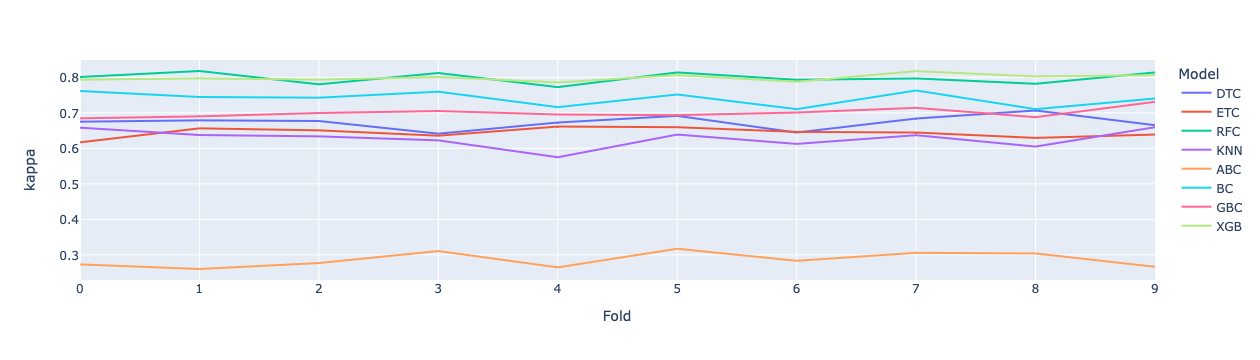

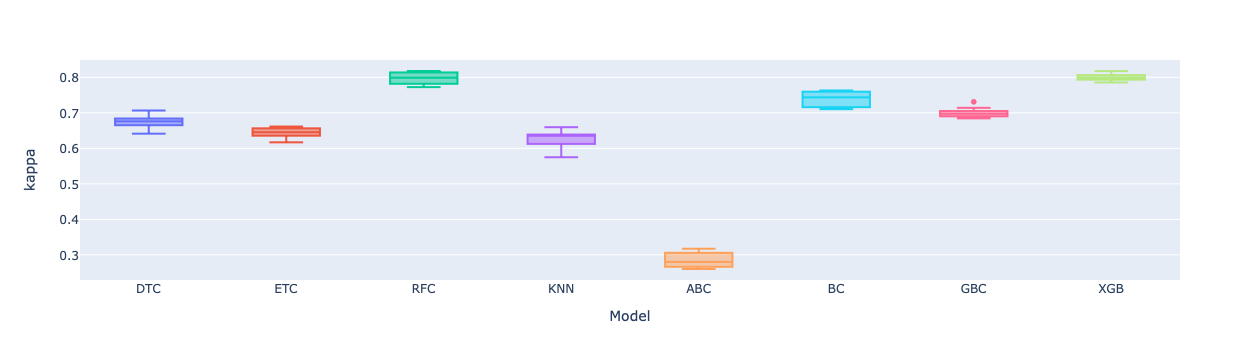

In [235]:
columns=['MODEL_NAME','MODEL_CONDITION','TRAIN_KAPPA','VALIDATION_KAPPA','MODEL_INSTANCE_USED','IDENTIFIER']
results_collection=pd.DataFrame(columns=columns)
models_predictions=pd.DataFrame()
model_stats=pd.DataFrame()
kappa_scorer = make_scorer(cohen_kappa_score)

print('*'*25)

for name, model in tree_models.items():
    
    cv_score=cross_val_score(model,X_train,Y_train,scoring=kappa_scorer,cv=kf)   
    res=pd.Series(cv_score).reset_index().rename(columns={0:scoring_method,'index':'Fold'})
    res['Model']=str(name)
    model_stats=pd.concat([model_stats,res])
    
    msg = "%s: Train Score -> %f (SD %f)" % (name, cv_score.mean(), cv_score.std())
    print(msg)
    
    
    model.fit(X_train,Y_train) 
    y_pred_model = model.predict(X_validation)
    print('Validation Score -> ', metrics.cohen_kappa_score(y_pred_model,Y_validation))
    
    temp_var={'MODEL_NAME':name,'MODEL_CONDITION':'Default_Parameter_With_Smote','TRAIN_KAPPA':cv_score.mean(),
              'VALIDATION_KAPPA':metrics.cohen_kappa_score(y_pred_model,Y_validation,weights='quadratic'),
              'MODEL_INSTANCE_USED':model,
              'IDENTIFIER':name+'_Base_With_Smote'
             
             }
    results_collection = results_collection.append(temp_var, ignore_index = True)
    models_predictions[name+'_Base_With_Smote']=y_pred_model
    
    
    print('*'*25)
    
    
fig1 = px.line(model_stats, x="Fold", y=scoring_method, color='Model')
fig1.show()

fig2 = px.box(model_stats, x="Model", y=scoring_method,color='Model')
fig2.update_layout(showlegend=False)
fig2.show()    

In [236]:
All_Model_Stats = All_Model_Stats.append(results_collection, ignore_index = True)
All_Model_Predictions = pd.concat([All_Model_Predictions, models_predictions], axis=1)

In [249]:
All_Model_Predictions

Target_Variable  DTC_Base_With_Smote  ETC_Base_With_Smote  \
0                   2                    3                    3   
1                   2                    1                    3   
2                   3                    2                    2   
3                   3                    3                    2   
4                   4                    2                    4   
...               ...                  ...                  ...   
1092                2                    2                    2   
1093                2                    3                    2   
1094                2                    2                    2   
1095                3                    3                    3   
1096                2                    2                    4   

      RFC_Base_With_Smote  KNN_Base_With_Smote  ABC_Base_With_Smote  \
0                       3                    2                    4   
1                       2                    2                    0   
2                       2                    0                    2   
3                       2                    5                    2   
4                       2                    0                    3   
...                   ...                  ...                  ...   
1092                    3                    5                    1   
1093                    3                    3                    2   
1094                    2                    3                    0   
1095                    3                    4                    4   
1096                    2                    3                    2   

      BC_Base_With_Smote  GBC_Base_With_Smote  XGB_Base_With_Smote  DTC_Base  \
0                      3                    3                    3         3   
1                      2                    2                    2         3   
2                      2                    3                    2         3   
3                      2                    2                    2         2   
4                      4                    3                    3         3   
...                  ...                  ...                  ...       ...   
1092                   3                    1                    2         3   
1093                   2                    3                    3         3   
1094                   2                    2                    2         1   
1095                   3                    4                    3         3   
1096                   2                    2                    2         2   

      ETC_Base  RFC_Base  KNN_Base  ABC_Base  BC_Base  GBC_Base  XGB_Base  
0            2         3         2         3        4         3         3  
1            2         2         2         2        2         2         2  
2            3         2         2         2        3         2         2  
3            2         2         2         2        2         2         2  
4            2         3         3         5        2         2         3  
...        ...       ...       ...       ...      ...       ...       ...  
1092         2         2         2         1        3         2         3  
1093         3         3         3         3        3         3         3  
1094         3         2         2         2        3         2         2  
1095         3         3         2         3        3         4         3  
1096         3         2         3         3        2         2         2  

[1097 rows x 17 columns]

<AxesSubplot:>

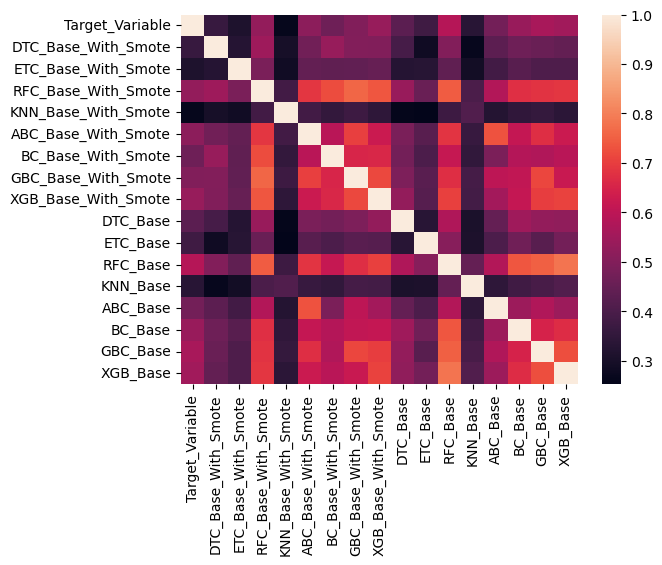

In [251]:

sns.heatmap(All_Model_Predictions.astype(np.int16).corr())

In [239]:

from sklearn.model_selection import  train_test_split,StratifiedKFold,cross_val_score
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,BaggingClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier,ExtraTreeClassifier
from sklearn.metrics import cohen_kappa_score, make_scorer
from xgboost import XGBClassifier

In [240]:
X = df_combined.drop(['quality','src','Id'] , axis =1 )
Y = df_combined[['quality']]
Y=Y-3
Y=Y.astype(np.int16)
#Y=Y.astype('str')
X_train , X_validation , Y_train , Y_validation = train_test_split(X , Y, stratify=Y, random_state = 12 ,test_size =0.30)
#X_train, Y_train = oversample.fit_resample(X_train, Y_train)

In [241]:
columns=['MODEL_NAME','MODEL_CONDITION','TRAIN_KAPPA','VALIDATION_KAPPA','MODEL_INSTANCE_USED','IDENTIFIER']
results_collection=pd.DataFrame(columns=columns)

models_predictions=pd.DataFrame()

In [242]:
tree_models = {
                "DTC" : DecisionTreeClassifier(random_state=12),
                "ETC" : ExtraTreeClassifier(random_state=12)    ,
                "RFC" : RandomForestClassifier(random_state=12),
                'KNN': KNeighborsClassifier(),
                "ABC" : AdaBoostClassifier(random_state=12)  ,
                "BC" : BaggingClassifier(random_state=12)  ,
                "GBC" : GradientBoostingClassifier(random_state=12),
                "XGB" : XGBClassifier()
                }
tree_models

{'DTC': DecisionTreeClassifier(random_state=12),
 'ETC': ExtraTreeClassifier(random_state=12),
 'RFC': RandomForestClassifier(random_state=12),
 'KNN': KNeighborsClassifier(),
 'ABC': AdaBoostClassifier(random_state=12),
 'BC': BaggingClassifier(random_state=12),
 'GBC': GradientBoostingClassifier(random_state=12),
 'XGB': XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               n_estimators=100, n_job

In [243]:
kf = StratifiedKFold( n_splits=10 ,shuffle=True, random_state=12)
scoring_method = 'kappa'

*************************
DTC: Train Score -> 0.271416 (SD 0.033618)
Validation Score ->  0.2896725954515674
*************************
ETC: Train Score -> 0.217797 (SD 0.032651)
Validation Score ->  0.2508660155653898
*************************
RFC: Train Score -> 0.372667 (SD 0.035786)
Validation Score ->  0.4327909169819003
*************************
KNN: Train Score -> 0.174334 (SD 0.053493)
Validation Score ->  0.18624600569528071
*************************
ABC: Train Score -> 0.146228 (SD 0.073941)
Validation Score ->  0.19502816765030806
*************************
BC: Train Score -> 0.340839 (SD 0.031466)
Validation Score ->  0.37012293848302047
*************************
GBC: Train Score -> 0.339149 (SD 0.024848)
Validation Score ->  0.4131124846272023
*************************
XGB: Train Score -> 0.334534 (SD 0.035050)
Validation Score ->  0.40686553879467824
*************************


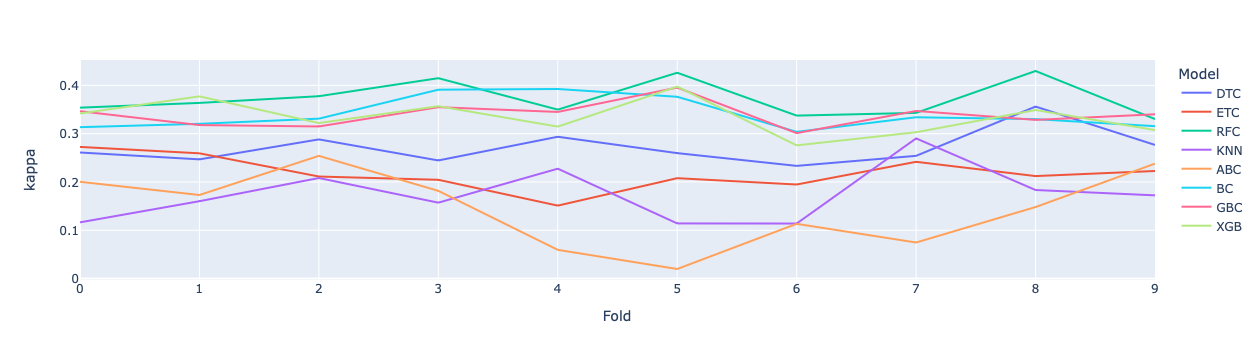

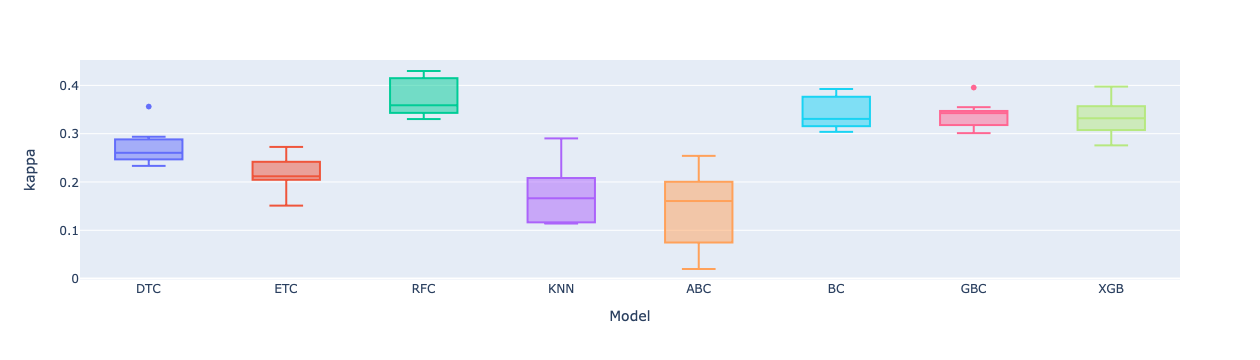

In [244]:
model_stats=pd.DataFrame()
kappa_scorer = make_scorer(cohen_kappa_score)

print('*'*25)

for name, model in tree_models.items():
    
    cv_score=cross_val_score(model,X_train,Y_train,scoring=kappa_scorer,cv=kf)   
    res=pd.Series(cv_score).reset_index().rename(columns={0:scoring_method,'index':'Fold'})
    res['Model']=str(name)
    model_stats=pd.concat([model_stats,res])
    
    msg = "%s: Train Score -> %f (SD %f)" % (name, cv_score.mean(), cv_score.std())
    print(msg)
    
    
    model.fit(X_train,Y_train) 
    y_pred_model = model.predict(X_validation)
    print('Validation Score -> ', metrics.cohen_kappa_score(y_pred_model,Y_validation))
    
    temp_var={'MODEL_NAME':name,'MODEL_CONDITION':'Default_Parameter','TRAIN_KAPPA':cv_score.mean(),
              'VALIDATION_KAPPA':metrics.cohen_kappa_score(y_pred_model,Y_validation,weights='quadratic'),
              'MODEL_INSTANCE_USED':model,
              'IDENTIFIER':name+'_Base'
             
             }
    results_collection = results_collection.append(temp_var, ignore_index = True)
    models_predictions[name+'_Base']=y_pred_model
    
    
    print('*'*25)
    
    
fig1 = px.line(model_stats, x="Fold", y=scoring_method, color='Model')
fig1.show()

fig2 = px.box(model_stats, x="Model", y=scoring_method,color='Model')
fig2.update_layout(showlegend=False)
fig2.show()    

In [245]:
All_Model_Stats = All_Model_Stats.append(results_collection, ignore_index = True)
All_Model_Predictions = pd.concat([All_Model_Predictions, models_predictions], axis=1)

In [248]:
All_Model_Stats

MODEL_NAME               MODEL_CONDITION  TRAIN_KAPPA  VALIDATION_KAPPA  \
0         DTC  Default_Parameter_With_Smote     0.673686          0.355068   
1         ETC  Default_Parameter_With_Smote     0.643983          0.298470   
2         RFC  Default_Parameter_With_Smote     0.798306          0.523919   
3         KNN  Default_Parameter_With_Smote     0.628002          0.230036   
4         ABC  Default_Parameter_With_Smote     0.286289          0.385340   
5          BC  Default_Parameter_With_Smote     0.740030          0.448900   
6         GBC  Default_Parameter_With_Smote     0.700191          0.484952   
7         XGB  Default_Parameter_With_Smote     0.799063          0.534241   
8         DTC             Default_Parameter     0.271416          0.429683   
9         ETC             Default_Parameter     0.217797          0.377348   
10        RFC             Default_Parameter     0.372667          0.565853   
11        KNN             Default_Parameter     0.174334          0.306836   
12        ABC             Default_Parameter     0.146228          0.422965   
13         BC             Default_Parameter     0.340839          0.520645   
14        GBC             Default_Parameter     0.339149          0.552262   
15        XGB             Default_Parameter     0.334534          0.538238   

                                  MODEL_INSTANCE_USED           IDENTIFIER  
0             DecisionTreeClassifier(random_state=12)  DTC_Base_With_Smote  
1                ExtraTreeClassifier(random_state=12)  ETC_Base_With_Smote  
2   (DecisionTreeClassifier(max_features='auto', r...  RFC_Base_With_Smote  
3                              KNeighborsClassifier()  KNN_Base_With_Smote  
4   (DecisionTreeClassifier(max_depth=1, random_st...  ABC_Base_With_Smote  
5   (DecisionTreeClassifier(random_state=191961371...   BC_Base_With_Smote  
6   ([DecisionTreeRegressor(criterion='friedman_ms...  GBC_Base_With_Smote  
7   XGBClassifier(base_score=None, booster=None, c...  XGB_Base_With_Smote  
8             DecisionTreeClassifier(random_state=12)             DTC_Base  
9                ExtraTreeClassifier(random_state=12)             ETC_Base  
10  (DecisionTreeClassifier(max_features='auto', r...             RFC_Base  
11                             KNeighborsClassifier()             KNN_Base  
12  (DecisionTreeClassifier(max_depth=1, random_st...             ABC_Base  
13  (DecisionTreeClassifier(random_state=191961371...              BC_Base  
14  ([DecisionTreeRegressor(criterion='friedman_ms...             GBC_Base  
15  XGBClassifier(base_score=None, booster=None, c...             XGB_Base

In [247]:
All_Model_Predictions.astype(np.int16).corr()

Target_Variable  DTC_Base_With_Smote  \
Target_Variable             1.000000             0.363282   
DTC_Base_With_Smote         0.363282             1.000000   
ETC_Base_With_Smote         0.313681             0.326753   
RFC_Base_With_Smote         0.527569             0.546109   
KNN_Base_With_Smote         0.262024             0.296616   
ABC_Base_With_Smote         0.516440             0.469428   
BC_Base_With_Smote          0.463129             0.535302   
GBC_Base_With_Smote         0.495364             0.498141   
XGB_Base_With_Smote         0.534895             0.497566   
DTC_Base                    0.429967             0.391661   
ETC_Base                    0.377407             0.282711   
RFC_Base                    0.587842             0.499548   
KNN_Base                    0.332668             0.264757   
ABC_Base                    0.471687             0.433172   
BC_Base                     0.536016             0.464161   
GBC_Base                    0.562550             0.454062   
XGB_Base                    0.552150             0.442899   

                     ETC_Base_With_Smote  RFC_Base_With_Smote  \
Target_Variable                 0.313681             0.527569   
DTC_Base_With_Smote             0.326753             0.546109   
ETC_Base_With_Smote             1.000000             0.484514   
RFC_Base_With_Smote             0.484514             1.000000   
KNN_Base_With_Smote             0.284907             0.382272   
ABC_Base_With_Smote             0.443377             0.685963   
BC_Base_With_Smote              0.439237             0.721867   
GBC_Base_With_Smote             0.439864             0.758818   
XGB_Base_With_Smote             0.448451             0.734986   
DTC_Base                        0.328188             0.537245   
ETC_Base                        0.330931             0.456217   
RFC_Base                        0.437509             0.744358   
KNN_Base                        0.289972             0.400461   
ABC_Base                        0.382035             0.580874   
BC_Base                         0.423916             0.673571   
GBC_Base                        0.404515             0.681367   
XGB_Base                        0.405857             0.684700   

                     KNN_Base_With_Smote  ABC_Base_With_Smote  \
Target_Variable                 0.262024             0.516440   
DTC_Base_With_Smote             0.296616             0.469428   
ETC_Base_With_Smote             0.284907             0.443377   
RFC_Base_With_Smote             0.382272             0.685963   
KNN_Base_With_Smote             1.000000             0.383753   
ABC_Base_With_Smote             0.383753             1.000000   
BC_Base_With_Smote              0.354428             0.593413   
GBC_Base_With_Smote             0.374924             0.699760   
XGB_Base_With_Smote             0.343213             0.626079   
DTC_Base                        0.260651             0.484780   
ETC_Base                        0.252574             0.424017   
RFC_Base                        0.374415             0.684080   
KNN_Base                        0.412879             0.362739   
ABC_Base                        0.325300             0.729164   
BC_Base                         0.348705             0.613334   
GBC_Base                        0.357641             0.672567   
XGB_Base                        0.337354             0.624019   

                     BC_Base_With_Smote  GBC_Base_With_Smote  \
Target_Variable                0.463129             0.495364   
DTC_Base_With_Smote            0.535302             0.498141   
ETC_Base_With_Smote            0.439237             0.439864   
RFC_Base_With_Smote            0.721867             0.758818   
KNN_Base_With_Smote            0.354428             0.374924   
ABC_Base_With_Smote            0.593413             0.699760   
BC_Base_With_Smote             1.000000             0.653625   
GBC_Base_With_Smote            0.653625             1.000000   
XGB_

In [ ]:

from imblearn.over_sampling import SMOTE

In [44]:
oversample = SMOTE()

In [45]:
Y.value_counts()

quality
5          1520
6          1416
7           532
4           108
8            57
3            22
dtype: int64

In [46]:
X, Y = oversample.fit_resample(X, Y)

In [48]:
X

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0          8.000000          0.500000     0.390000        2.200000   0.073000   
1          9.300000          0.300000     0.730000        2.300000   0.092000   
2          7.100000          0.510000     0.030000        2.100000   0.059000   
3          8.100000          0.870000     0.220000        2.600000   0.084000   
4          8.500000          0.360000     0.300000        2.300000   0.079000   
...             ...               ...          ...             ...        ...   
9115       5.669674          0.424511     0.270739        2.489022   0.059317   
9116       6.245324          0.539377     0.038753        4.358758   0.075875   
9117       9.999126          0.306628     0.473401        5.029351   0.081023   
9118      10.218710          0.371738     0.503476        2.730484   0.072203   
9119       6.744406          0.836128     0.037762        1.700000   0.086290   

      free sulfur dioxide  total sulfur dioxide   density        pH  \
0               30.000000             39.000000  0.995720  3.330000   
1               30.000000             67.000000  0.998540  3.320000   
2                3.000000             12.000000  0.996600  3.520000   
3               11.000000             65.000000  0.997300  3.200000   
4               10.000000             45.000000  0.994440  3.200000   
...                   ...                   ...       ...       ...   
9115            10.560870             35.329348  0.993034  3.223293   
9116            17.453241             54.906482  0.995410  3.506091   
9117             5.000000             13.334305  0.998001  3.240029   
9118             9.203226             37.724597  0.996880  3.277540   
9119            24.733565             34.133218  0.995848  3.530231   

      sulphates    alcohol  
0      0.770000  12.100000  
1      0.670000  12.800000  
2      0.730000  11.300000  
3      0.530000   9.800000  
4      1.360000   9.500000  
...         ...        ...  
9115   0.582935  12.068261  
9116   0.840623  11.421821  
9117   0.820000  12.299126  
9118   0.852754  11.495726  
9119   0.817780  10.111015  

[9120 rows x 11 columns]

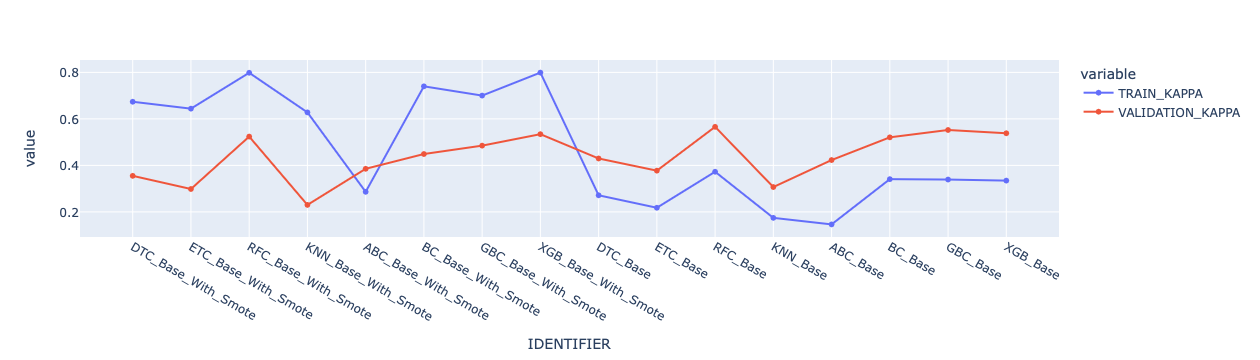

In [246]:
line = px.line(data_frame= All_Model_Stats ,x='IDENTIFIER',y =['TRAIN_KAPPA','VALIDATION_KAPPA'] , markers = True)
line.show()

In [ ]:

from imblearn.over_sampling import SMOTE
from collections import Counter
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder
# define the dataset location
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/glass.csv'
# load the csv file as a data frame
df = read_csv(url, header=None)
data = df.values
# split into input and output elements
X, y = data[:, :-1], data[:, -1]
# label encode the target variable
y = LabelEncoder().fit_transform(y)
# transform the dataset
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
 per = v / len(y) * 100
 print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

In [29]:
X = df_combined.drop(['quality','src','Id'] , axis =1 )
Y = df_combined[['quality']]

Y=Y.astype(np.int16)
rfc_col=['alcohol', 'sulphates', 'chlorides', 'citric acid', 'pH', 'volatile acidity', 'residual sugar']
rfc=RandomForestClassifier(random_state=random_number)
rfc.fit(X[rfc_col],Y)
k=rfc.predict(df_test[rfc_col])


KeyError: "['Id'] not found in axis"